In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/lof/data-lof-2024-04-15.csv")
df = pd.read_csv("data/inc/data-inc-2024-04-22.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100236 entries, 0 to 100235
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100236 non-null  int64  
 1   id_mls                    100236 non-null  object 
 2   bathrooms_total           100236 non-null  float64
 3   bedrooms_extra            100236 non-null  float64
 4   bedrooms                  100236 non-null  float64
 5   stories_total             100236 non-null  float64
 6   size_interior             100236 non-null  float64
 7   building_type             100236 non-null  object 
 8   agency_name               100236 non-null  object 
 9   agency_type               100236 non-null  object 
 10  property_type             100236 non-null  object 
 11  lng                       100236 non-null  float64
 12  lat                       100236 non-null  float64
 13  ownership_type            100236 non-null  o

# First Glance

In [4]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26782429,24008132,3,4 + 1,NaN,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.239302,Freehold,1,59.31X131.63,0,https://realtor.ca/real-estate/26782429/4661-s...,638493917078870000,N9G2V1,Ontario,849900.0
1,26782419,24008291,1,2 + 0,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.304374,Freehold,1,45.17X147.5,0,https://realtor.ca/real-estate/26782419/1722-k...,638493917016270000,N8W2W6,Ontario,349900.0
2,26782175,24008275,2,3 + 0,1.5,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.304615,Freehold,1,33.13X87.48,0,https://realtor.ca/real-estate/26782175/1432-l...,638493881008200000,N8X4A5,Ontario,379900.0
3,26782172,24008278,2,4 + 1,2.0,NaN,Duplex,KEY SOLUTIONS REALTY LTD. - 390,Firm,Single Family,...,42.310958,Freehold,1,29.11X121.30,0,https://realtor.ca/real-estate/26782172/947-wi...,638493881002070000,N9A1K1,Ontario,424900.0
4,26782021,24008248,1,2 + 0,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0


In [5]:
df.shape

(25267, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25267 entries, 0 to 25266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25267 non-null  int64  
 1   id_mls                    25267 non-null  object 
 2   bathrooms_total           25267 non-null  int64  
 3   bedrooms                  25267 non-null  object 
 4   stories_total             16388 non-null  float64
 5   size_interior             13326 non-null  object 
 6   building_type             25267 non-null  object 
 7   agency_name               25267 non-null  object 
 8   agency_type               25267 non-null  object 
 9   property_type             25267 non-null  object 
 10  lng                       25267 non-null  float64
 11  lat                       25267 non-null  float64
 12  ownership_type            25267 non-null  object 
 13  ownership_type_group_ids  25267 non-null  object 
 14  land_s

In [7]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26782021,24008248,1,2 + 0,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0
5,26782022,24008247,1,2 + 0,1.0,759.0000,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.296095,Freehold,1,40.16X100.38,0,https://realtor.ca/real-estate/26782022/2209-f...,638493842661500000,N8W2G7,Ontario,299900.0
11,26779494,40574518,2,5 + 0,2.0,1400.0000,House,Davenport Realty Brokerage,Firm,Single Family,...,42.290048,Freehold,1,under 1/2 acre,0,https://realtor.ca/real-estate/26779494/3765-3...,638492098921930000,N9C1K1,Ontario,499000.0
14,26777678,24008223,2,2 + 0,1.0,1400.0000,Row / Townhouse,PINNACLE PLUS REALTY LTD.,Firm,Single Family,...,42.131642,Freehold,1,51.94X98.46,0,https://realtor.ca/real-estate/26777678/600-ha...,638491576664470000,N9V0H1,Ontario,649000.0
15,26777430,24008104,1,2 + 0,1.0,1050.0000,House,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,Single Family,...,42.047794,Freehold,1,51.93X281.58,0,https://realtor.ca/real-estate/26777430/1810-e...,638491540841230000,N9V2Y8,Ontario,699900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25262,26767433,5759,2,4,NaN,974 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.440281,none,none,6286,0,https://realtor.ca/real-estate/26767433/5020-f...,638490372767200000,X1A3E8,Northwest Territories,629900.0
25263,26751728,5757,2,2,NaN,1411 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.469256,none,none,6069,0,https://realtor.ca/real-estate/26751728/22-mor...,638487964699230000,NaN,Northwest Territories,859000.0
25264,26751619,5756,2,3,NaN,1436 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.453322,none,none,6560,0,https://realtor.ca/real-estate/26751619/144-ka...,638487951446000000,NaN,Northwest Territories,649000.0
25265,26750770,5755,2,3,NaN,1149 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.444265,none,none,8024,0,https://realtor.ca/real-estate/26750770/6209-f...,638487892925970000,NaN,Northwest Territories,385000.0


In [8]:
df_with_size["province"].value_counts()

province
British Columbia           4077
Ontario                    3389
Alberta                    2634
Quebec                     1596
Saskatchewan                587
Manitoba                    556
New Brunswick               321
Newfoundland & Labrador     135
Yukon                        18
Northwest Territories        13
Name: count, dtype: int64

In [9]:
df["province"].value_counts()

province
Ontario                    11656
British Columbia            4367
Quebec                      3655
Alberta                     2815
Saskatchewan                 702
Manitoba                     640
Nova Scotia                  624
New Brunswick                439
Newfoundland & Labrador      177
Prince Edward Island         160
Yukon                         19
Northwest Territories         13
Name: count, dtype: int64

In [10]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,25267.0,25267.0,16388.0,25267.0,25267.0,25267.0,2.526700e+04,25267.0
mean,26766211.0,2.0,2.0,-90.0,47.0,2.0,6.384901e+17,877750.0
std,9411.0,1.0,4.0,20.0,3.0,4.0,1.514674e+12,1042417.0
min,26749541.0,0.0,1.0,-135.0,42.0,0.0,6.384872e+17,1.0
25%,26758200.0,1.0,1.0,-114.0,44.0,0.0,6.384889e+17,419000.0
50%,26766279.0,2.0,2.0,-80.0,45.0,1.0,6.384899e+17,659900.0
75%,26774288.0,3.0,2.0,-78.0,49.0,4.0,6.384913e+17,999777.0
max,26782773.0,28.0,350.0,-53.0,65.0,217.0,6.384940e+17,60000000.0


# Remove Duplicates

In [11]:
len(df["id"].unique())

25258

In [12]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

18


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10527,26750142,202407102,2,3 + 1,2.0,NaN,House,Viewpoint Realty Services Inc.,Firm,Single Family,...,44.669746,Freehold,1,0.6902 ac,0,https://realtor.ca/real-estate/26750142/33-dav...,638487785180300000,B2Z1N8,Nova Scotia,649900.0
10528,26750142,202407102,2,3 + 1,2.0,NaN,House,Viewpoint Realty Services Inc.,Firm,Single Family,...,44.669746,Freehold,1,0.6902 ac,0,https://realtor.ca/real-estate/26750142/33-dav...,638487785180300000,B2Z1N8,Nova Scotia,649900.0
18239,26753561,R2870598,1,1,NaN,508 sqft,Apartment,RE/MAX Westcoast,Firm,Single Family,...,49.276225,Strata,2,0,1,https://realtor.ca/real-estate/26753561/3009-9...,638488075211730000,V6Z3G6,British Columbia,669000.0
18240,26753561,R2870598,1,1,NaN,508 sqft,Apartment,RE/MAX Westcoast,Firm,Single Family,...,49.276225,Strata,2,0,1,https://realtor.ca/real-estate/26753561/3009-9...,638488075211730000,V6Z3G6,British Columbia,669000.0
6897,26754214,W8236560,1,1,NaN,NaN,Apartment,HOMELIFE/MIRACLE REALTY LTD,Firm,Single Family,...,43.636293,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26754214/708-10...,638488134635200000,M5S5B3,Ontario,572999.0
6898,26754214,W8236560,1,1,NaN,NaN,Apartment,HOMELIFE/MIRACLE REALTY LTD,Firm,Single Family,...,43.636293,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26754214/708-10...,638488134635200000,M5S5B3,Ontario,572999.0
6295,26758795,C8240028,1,1 + 1,NaN,NaN,Apartment,CENTURY 21 KENNECT REALTY,Firm,Single Family,...,43.774248,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26758795/269-60...,638488922359800000,M2J0C8,Ontario,610888.0
6298,26758795,C8240028,1,1 + 1,NaN,NaN,Apartment,CENTURY 21 KENNECT REALTY,Firm,Single Family,...,43.774248,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26758795/269-60...,638488922359800000,M2J0C8,Ontario,610888.0
11596,26760682,1386502,5,4 + 1,2.0,NaN,House,ROYAL LEPAGE TEAM REALTY,Firm,Single Family,...,45.379857,Freehold,1,49.87 ft X 102.86 ft,4,https://realtor.ca/real-estate/26760682/686-hi...,638489094739770000,K2A2N3,Ontario,3399900.0
11597,26760682,1386502,5,4 + 1,2.0,NaN,House,ROYAL LEPAGE TEAM REALTY,Firm,Single Family,...,45.379857,Freehold,1,49.87 ft X 102.86 ft,4,https://realtor.ca/real-estate/26760682/686-hi...,638489094739770000,K2A2N3,Ontario,3399900.0


In [13]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10528,26750142,202407102,2,3 + 1,2.0,NaN,House,Viewpoint Realty Services Inc.,Firm,Single Family,...,44.669746,Freehold,1,0.6902 ac,0,https://realtor.ca/real-estate/26750142/33-dav...,638487785180300000,B2Z1N8,Nova Scotia,649900.0
18240,26753561,R2870598,1,1,NaN,508 sqft,Apartment,RE/MAX Westcoast,Firm,Single Family,...,49.276225,Strata,2,0,1,https://realtor.ca/real-estate/26753561/3009-9...,638488075211730000,V6Z3G6,British Columbia,669000.0
6898,26754214,W8236560,1,1,NaN,NaN,Apartment,HOMELIFE/MIRACLE REALTY LTD,Firm,Single Family,...,43.636293,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26754214/708-10...,638488134635200000,M5S5B3,Ontario,572999.0
6298,26758795,C8240028,1,1 + 1,NaN,NaN,Apartment,CENTURY 21 KENNECT REALTY,Firm,Single Family,...,43.774248,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26758795/269-60...,638488922359800000,M2J0C8,Ontario,610888.0
11597,26760682,1386502,5,4 + 1,2.0,NaN,House,ROYAL LEPAGE TEAM REALTY,Firm,Single Family,...,45.379857,Freehold,1,49.87 ft X 102.86 ft,4,https://realtor.ca/real-estate/26760682/686-hi...,638489094739770000,K2A2N3,Ontario,3399900.0
7762,26762705,E8242416,4,4,2.0,NaN,House,RE/MAX ROUGE RIVER REALTY LTD.,Firm,Single Family,...,43.886922,Freehold,1,50.75 x 116.51 FT ; 21.70 X 29.10 X 114.91 X 5...,6,https://realtor.ca/real-estate/26762705/6-cluf...,638489645548130000,L1P1R5,Ontario,1499900.0
4098,26772783,X8249558,2,3,1.0,NaN,House,REAL BROKER ONTARIO LTD.,Firm,Single Family,...,43.046726,Freehold,1,55 x 108 FT,6,https://realtor.ca/real-estate/26772783/4413-m...,638490799982530000,L2G0E8,Ontario,799900.0
17441,26772860,R2872600,4,4,NaN,2333 sqft,Duplex,Parallel 49 Realty,Firm,Single Family,...,49.260276,Strata,2,0,1,https://realtor.ca/real-estate/26772860/2254-e...,638490811028970000,V5N1Z6,British Columbia,1999800.0
17440,26772862,R2872617,1,1,NaN,510 sqft,Apartment,Pacific Evergreen Realty Ltd.,Firm,Single Family,...,49.275182,Strata,2,0,1,https://realtor.ca/real-estate/26772862/1103-8...,638490811032870000,V6Z0E7,British Columbia,769000.0


In [14]:
df = df.drop_duplicates(subset="id", keep=False)

In [15]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [16]:
# df = df.drop(["id", "id_mls"], axis=1)

In [17]:
df.shape

(25249, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25249 entries, 0 to 25266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25249 non-null  int64  
 1   id_mls                    25249 non-null  object 
 2   bathrooms_total           25249 non-null  int64  
 3   bedrooms                  25249 non-null  object 
 4   stories_total             16380 non-null  float64
 5   size_interior             13320 non-null  object 
 6   building_type             25249 non-null  object 
 7   agency_name               25249 non-null  object 
 8   agency_type               25249 non-null  object 
 9   property_type             25249 non-null  object 
 10  lng                       25249 non-null  float64
 11  lat                       25249 non-null  float64
 12  ownership_type            25249 non-null  object 
 13  ownership_type_group_ids  25249 non-null  object 
 14  land_size  

In [19]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  14326
none                       4072
Condominium/Strata         4018
Strata                     1881
Condominium                 553
Leasehold                   164
Freehold Condo               79
Leasehold Condo/Strata       47
Undivided Co-ownership       42
Shares in Co-operative       25
Unknown                      11
Leasehold/Leased Land        11
Timeshare/Fractional          8
Other, See Remarks            6
Cooperative                   3
Life Lease                    3
Name: count, dtype: int64

In [20]:
df["building_type"].value_counts()

building_type
House                       14152
Apartment                    4646
Row / Townhouse              2550
none                         1966
Duplex                        665
Mobile Home                   203
Triplex                       192
Multi-Family                  146
No Building                   141
Unknown                       108
Other                         103
Fourplex                      101
Recreational                  100
Manufactured Home              88
Manufactured Home/Mobile       52
Modular                        16
Two Apartment House             9
Parking                         7
Commercial Mix                  3
Commercial Apartment            1
Name: count, dtype: int64

In [21]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold                  68
none                      29
Strata                     3
Condominium/Strata         2
Shares in Co-operative     1
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [23]:
df["property_type"].value_counts()

property_type
Single Family    22741
Vacant Land       1877
Multi-family       414
Agriculture        131
Recreational        78
Parking              8
Name: count, dtype: int64

In [24]:
df[df["property_type"] == "Business"]["page_url"]

Series([], Name: page_url, dtype: object)

In [25]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [26]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [27]:
df_sf = df[df["property_type"] == "Single Family"]

In [28]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22741 entries, 0 to 25266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        22741 non-null  int64  
 1   id_mls                    22741 non-null  object 
 2   bathrooms_total           22741 non-null  int64  
 3   bedrooms                  22741 non-null  object 
 4   stories_total             16006 non-null  float64
 5   size_interior             13028 non-null  object 
 6   building_type             22741 non-null  object 
 7   agency_name               22741 non-null  object 
 8   agency_type               22741 non-null  object 
 9   property_type             22741 non-null  object 
 10  lng                       22741 non-null  float64
 11  lat                       22741 non-null  float64
 12  ownership_type            22741 non-null  object 
 13  ownership_type_group_ids  22741 non-null  object 
 14  land_size  

In [29]:
df_sf["province"].value_counts()

province
Ontario                    10751
British Columbia            4033
Quebec                      3245
Alberta                     2601
Saskatchewan                 587
Manitoba                     553
Nova Scotia                  427
New Brunswick                308
Newfoundland & Labrador      123
Prince Edward Island          81
Yukon                         19
Northwest Territories         13
Name: count, dtype: int64

In [30]:
df_sf["building_type"].value_counts()

building_type
House                       14141
Apartment                    4638
Row / Townhouse              2550
Duplex                        552
none                          234
Mobile Home                   203
Triplex                       140
Manufactured Home              88
Fourplex                       71
Manufactured Home/Mobile       52
Recreational                   35
Modular                        16
Other                           9
Two Apartment House             9
Multi-Family                    3
Name: count, dtype: int64

In [31]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  12943
Condominium/Strata         3995
none                       3015
Strata                     1856
Condominium                 553
Leasehold                   161
Freehold Condo               79
Leasehold Condo/Strata       47
Undivided Co-ownership       42
Shares in Co-operative       12
Leasehold/Leased Land        11
Unknown                       9
Timeshare/Fractional          8
Other, See Remarks            4
Cooperative                   3
Life Lease                    3
Name: count, dtype: int64

In [32]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
55,26768284,24008060,2,4 + 0,1.0,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.321250,none,none,30X132,0,https://realtor.ca/real-estate/26768284/781-ch...,638490496617400000,N9A2X6,Ontario,289900.0
68,26765208,24008034,0,0 + 0,NaN,NaN,none,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.321533,none,none,30X97.5,0,https://realtor.ca/real-estate/26765208/vl-cha...,638489812567230000,N9A2X6,Ontario,149000.0
79,26762257,24007978,2,2 + 0,NaN,1200.0000,Apartment,"COLDWELL BANKER TAILORED REALTY, BROKERAGE",Firm,Single Family,...,42.251214,none,none,NaN,0,https://realtor.ca/real-estate/26762257/3855-s...,638489632476100000,N9G2N7,Ontario,359900.0
81,26762254,24007982,2,2 + 0,NaN,1189.0000,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,Single Family,...,42.244426,none,none,0X,0,https://realtor.ca/real-estate/26762254/1855-n...,638489632465200000,N9H2R4,Ontario,399900.0
93,26759594,24007935,3,6 + 0,NaN,2800.0000,Duplex,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.321250,none,none,30X97.5,0,https://realtor.ca/real-estate/26759594/vl-cha...,638488984667300000,N9A2X6,Ontario,849000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25262,26767433,5759,2,4,NaN,974 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.440281,none,none,6286,0,https://realtor.ca/real-estate/26767433/5020-f...,638490372767200000,X1A3E8,Northwest Territories,629900.0
25263,26751728,5757,2,2,NaN,1411 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.469256,none,none,6069,0,https://realtor.ca/real-estate/26751728/22-mor...,638487964699230000,NaN,Northwest Territories,859000.0
25264,26751619,5756,2,3,NaN,1436 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.453322,none,none,6560,0,https://realtor.ca/real-estate/26751619/144-ka...,638487951446000000,NaN,Northwest Territories,649000.0
25265,26750770,5755,2,3,NaN,1149 sqft,Mobile Home,COLDWELL BANKER NBS,Firm,Single Family,...,62.444265,none,none,8024,0,https://realtor.ca/real-estate/26750770/6209-f...,638487892925970000,NaN,Northwest Territories,385000.0


In [33]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

55       https://realtor.ca/real-estate/26768284/781-ch...
68       https://realtor.ca/real-estate/26765208/vl-cha...
79       https://realtor.ca/real-estate/26762257/3855-s...
81       https://realtor.ca/real-estate/26762254/1855-n...
93       https://realtor.ca/real-estate/26759594/vl-cha...
                               ...                        
25262    https://realtor.ca/real-estate/26767433/5020-f...
25263    https://realtor.ca/real-estate/26751728/22-mor...
25264    https://realtor.ca/real-estate/26751619/144-ka...
25265    https://realtor.ca/real-estate/26750770/6209-f...
25266    https://realtor.ca/real-estate/26775346/429-ma...
Name: page_url, Length: 3015, dtype: object

In [34]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

488      https://realtor.ca/real-estate/26777546/22790-...
1288     https://realtor.ca/real-estate/26775493/2b-alg...
1351     https://realtor.ca/real-estate/26769023/11-riv...
1483     https://realtor.ca/real-estate/26756494/47-alg...
1667     https://realtor.ca/real-estate/26778072/66-fai...
1770     https://realtor.ca/real-estate/26775113/580-be...
2617     https://realtor.ca/real-estate/26751876/49-fai...
8307     https://realtor.ca/real-estate/26755750/315637...
8784     https://realtor.ca/real-estate/26769390/47-ind...
8911     https://realtor.ca/real-estate/26765431/9-sout...
9201     https://realtor.ca/real-estate/26756051/79-pen...
9380     https://realtor.ca/real-estate/26779649/1265-c...
9420     https://realtor.ca/real-estate/26774354/1064-e...
9947     https://realtor.ca/real-estate/26772916/26-sal...
11846    https://realtor.ca/real-estate/26779581/199-in...
11847    https://realtor.ca/real-estate/26779582/199-in...
Name: page_url, dtype: object

In [35]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,
Alberta,478,214,4,1527,8,32,25,0,0,0,5,308,0,0,0
British Columbia,1188,131,2,1970,76,20,15,0,0,0,0,615,3,0,13
Manitoba,59,12,0,454,0,0,14,0,0,2,0,12,0,0,0
New Brunswick,2,0,0,291,0,0,6,0,0,0,0,7,0,0,2
Newfoundland & Labrador,0,0,0,111,0,0,0,0,3,0,0,0,0,9,0
Northwest Territories,1,0,0,7,2,0,1,0,0,0,0,2,0,0,0
Nova Scotia,14,11,0,340,0,0,19,0,0,0,27,13,0,0,3
Ontario,2037,43,8,6902,0,0,62,16,0,7,3,1470,19,0,184
Prince Edward Island,3,1,0,68,0,0,6,0,0,0,0,3,0,0,0


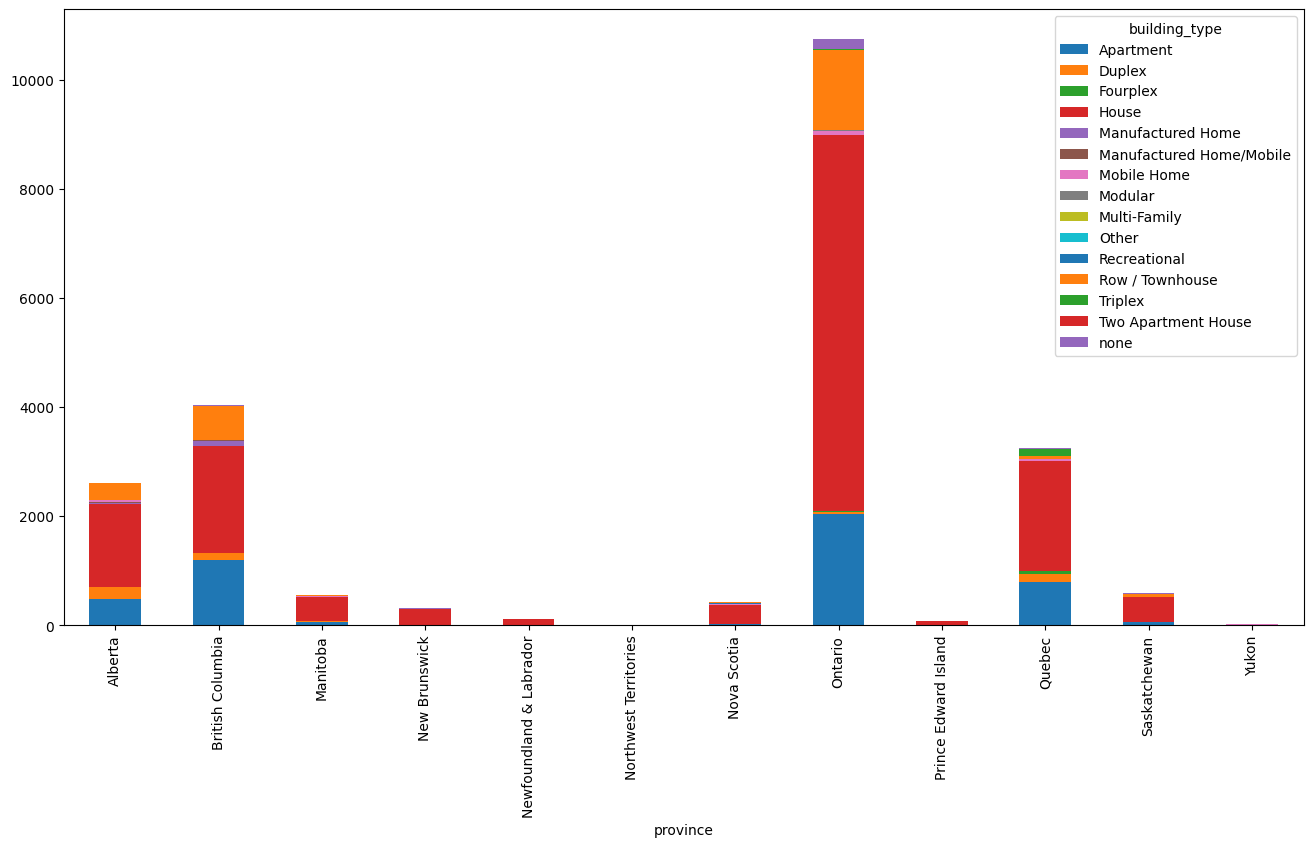

In [36]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

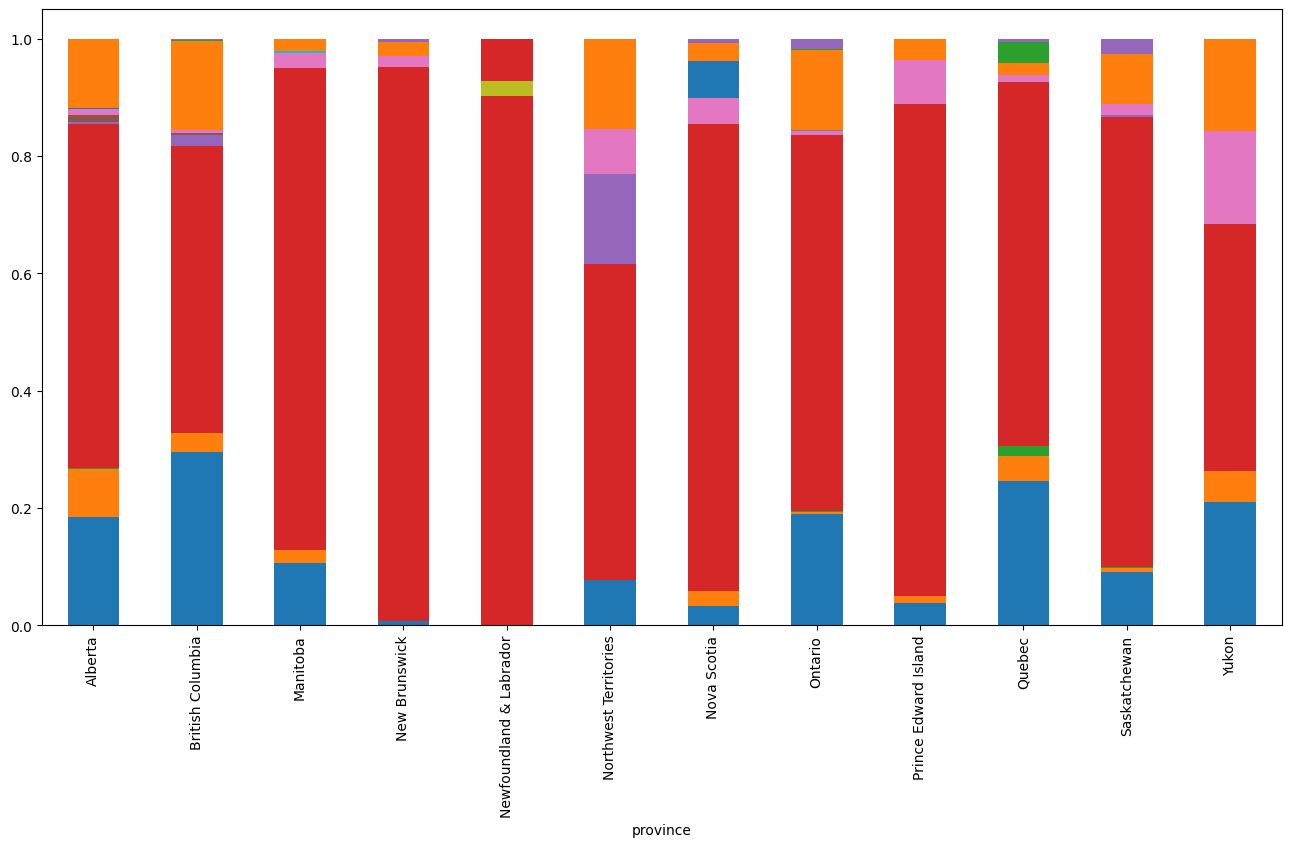

In [37]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [38]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,799,0,1674,0,4,0,0,0,0,0,0,0,0,0,124
British Columbia,0,71,0,1937,0,65,35,11,0,1,4,1856,4,0,7,42
Manitoba,0,0,0,463,79,11,0,0,0,0,0,0,0,0,0,0
New Brunswick,0,7,0,202,0,9,0,0,0,0,0,0,0,0,1,89
Newfoundland & Labrador,0,0,0,122,0,1,0,0,0,0,0,0,0,0,0,0
Northwest Territories,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12
Nova Scotia,0,21,0,396,0,7,0,0,0,0,0,0,1,1,1,0
Ontario,553,2148,3,7638,0,57,12,0,3,3,8,0,3,3,0,320
Prince Edward Island,0,3,0,74,0,4,0,0,0,0,0,0,0,0,0,0


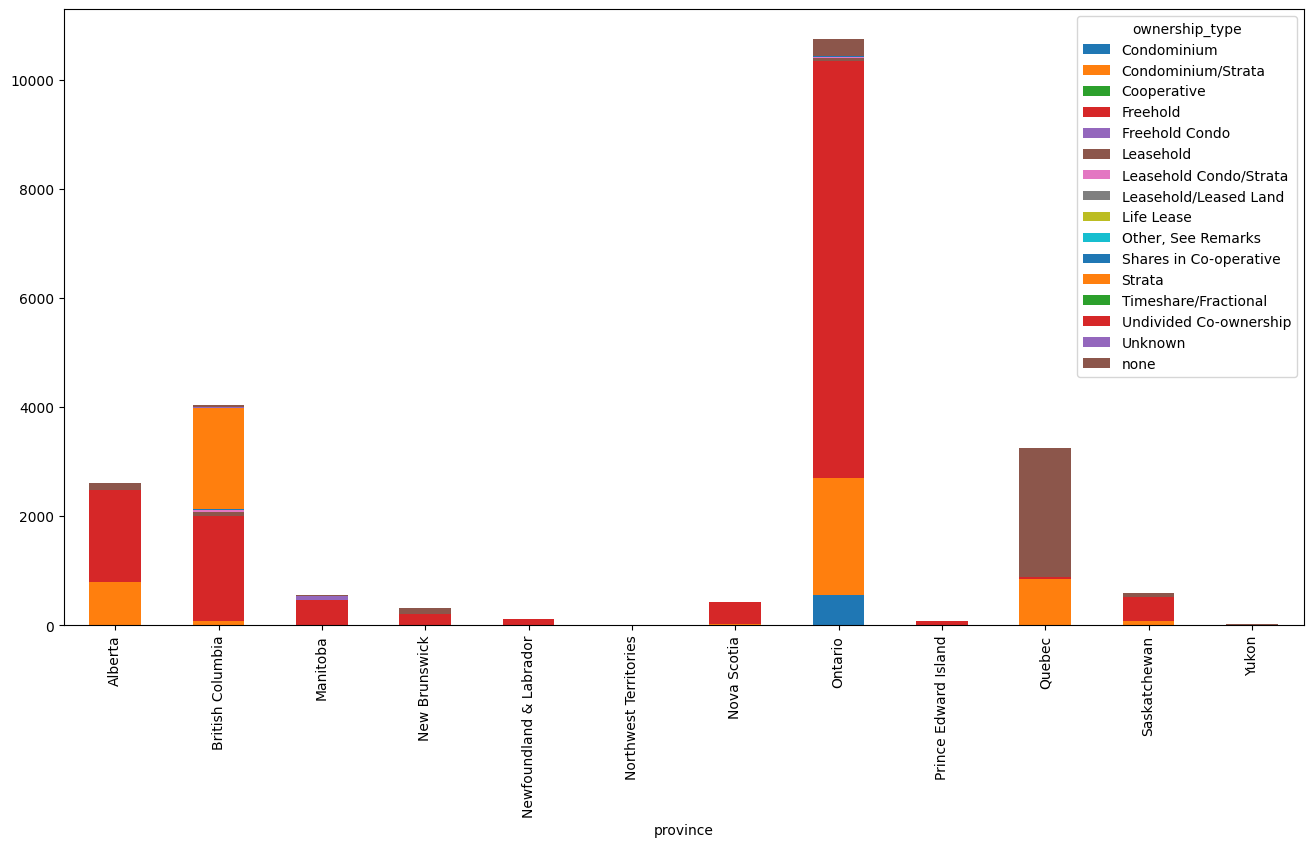

In [39]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

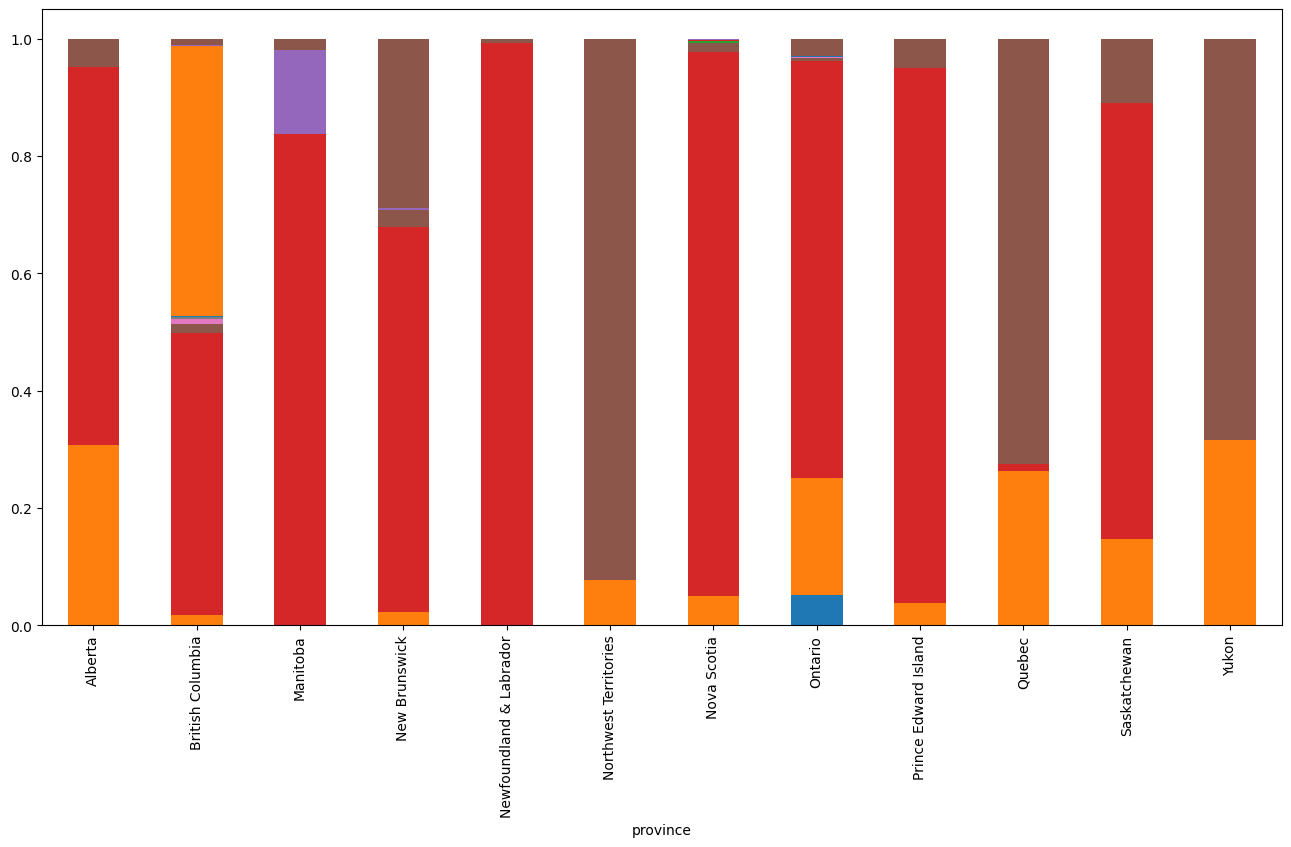

In [40]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [41]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        2978
Strata                    1099
Condominium                362
Freehold Condo              58
Undivided Co-ownership      41
Leasehold Condo/Strata      35
Freehold                    18
none                        17
Shares in Co-operative       9
Leasehold                    8
Timeshare/Fractional         4
Leasehold/Leased Land        4
Life Lease                   3
Cooperative                  1
Other, See Remarks           1
Name: count, dtype: int64

In [42]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold                  253
none                      169
Strata                     92
Condominium/Strata         37
Leasehold Condo/Strata      1
Name: count, dtype: int64

In [43]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,
Condominium,362,0,0,7,0,0,0,0,0,0,0,180,0,0,4
Condominium/Strata,2978,37,0,68,0,5,0,0,0,2,2,881,0,0,22
Cooperative,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
Freehold,18,253,7,11570,17,41,40,6,3,2,31,897,2,9,47
Freehold Condo,58,0,0,10,0,0,0,0,0,0,0,11,0,0,0
Leasehold,8,0,0,55,26,5,48,10,0,0,0,5,0,0,4
Leasehold Condo/Strata,35,1,0,0,2,0,0,0,0,0,0,9,0,0,0
Leasehold/Leased Land,4,0,0,3,1,0,0,0,0,0,0,3,0,0,0
Life Lease,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


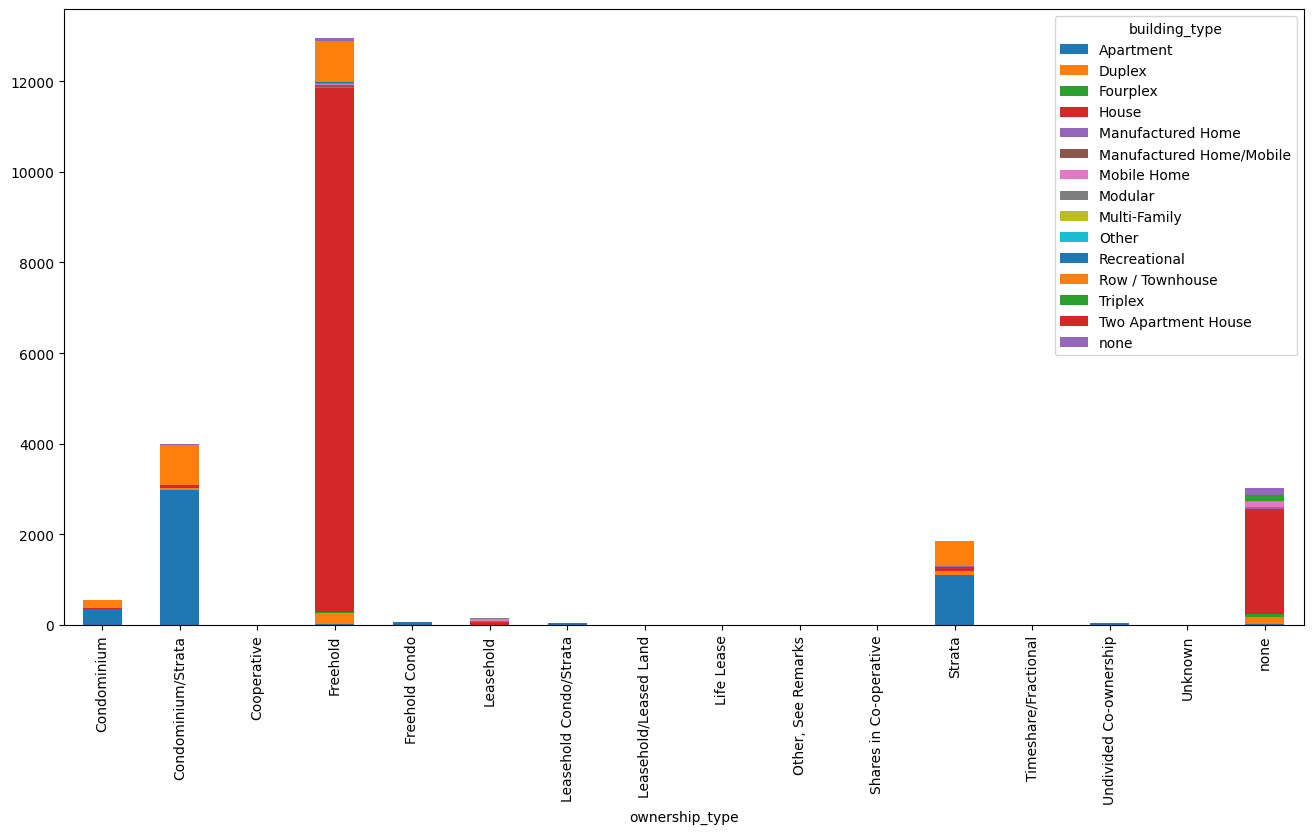

In [44]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

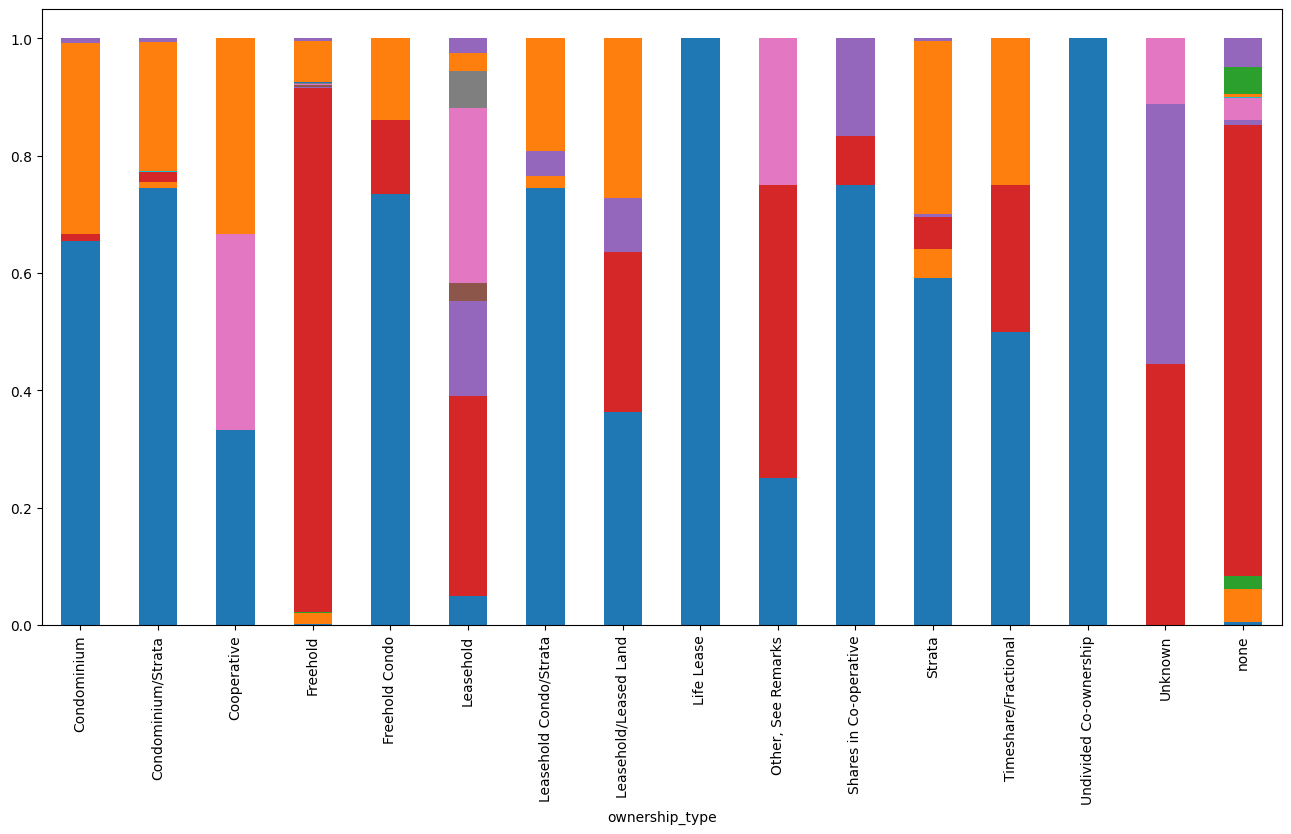

In [45]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [46]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,552.0,552.0,334.0,552.0,552.0,552.0,5.520000e+02,552.0
mean,26767345.0,3.0,2.0,-102.0,49.0,2.0,6.384902e+17,749525.0
std,9111.0,1.0,0.0,21.0,3.0,3.0,1.456569e+12,557229.0
min,26749798.0,0.0,1.0,-135.0,42.0,0.0,6.384874e+17,99000.0
25%,26759514.0,2.0,2.0,-116.0,46.0,0.0,6.384890e+17,399900.0
50%,26767704.0,3.0,2.0,-114.0,49.0,2.0,6.384904e+17,549900.0
75%,26775352.0,3.0,2.0,-76.0,52.0,3.0,6.384914e+17,849925.0
max,26782712.0,8.0,3.0,-63.0,61.0,32.0,6.384940e+17,3999000.0


In [47]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,140.0,140.0,66.0,140.0,140.0,140.0,1.400000e+02,140.0
mean,26765569.0,1.0,2.0,-75.0,46.0,3.0,6.384899e+17,822078.0
std,9078.0,1.0,0.0,7.0,1.0,3.0,1.422937e+12,410344.0
min,26749770.0,1.0,1.0,-123.0,43.0,0.0,6.384873e+17,125000.0
25%,26758844.0,1.0,2.0,-74.0,45.0,0.0,6.384889e+17,577225.0
50%,26764518.0,1.0,2.0,-74.0,46.0,3.0,6.384898e+17,795000.0
75%,26773310.0,1.0,2.0,-73.0,46.0,6.0,6.384909e+17,948250.0
max,26781723.0,7.0,3.0,-69.0,50.0,13.0,6.384935e+17,2599000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,71.0,71.0,39.0,71.0,71.0,71.0,7.100000e+01,71.0
mean,26767331.0,2.0,2.0,-78.0,46.0,3.0,6.384903e+17,919314.0
std,10559.0,1.0,1.0,13.0,2.0,4.0,1.774059e+12,416079.0
min,26749718.0,1.0,1.0,-125.0,43.0,0.0,6.384873e+17,249000.0
25%,26758274.0,1.0,2.0,-74.0,45.0,0.0,6.384889e+17,642450.0
50%,26767557.0,1.0,2.0,-74.0,46.0,2.0,6.384904e+17,899000.0
75%,26777857.0,2.0,2.0,-73.0,46.0,6.0,6.384916e+17,1199450.0
max,26782667.0,7.0,3.0,-67.0,54.0,16.0,6.384940e+17,2880000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2550.0,2550.0,1833.0,2550.0,2550.0,2550.0,2.550000e+03,2550.0
mean,26766276.0,3.0,2.0,-94.0,46.0,2.0,6.384901e+17,768544.0
std,9053.0,1.0,1.0,20.0,3.0,5.0,1.453482e+12,404213.0
min,26749560.0,0.0,1.0,-135.0,42.0,0.0,6.384872e+17,2200.0
25%,26758848.0,2.0,2.0,-114.0,44.0,1.0,6.384889e+17,524999.0
50%,26766218.0,3.0,2.0,-80.0,45.0,2.0,6.384899e+17,699900.0
75%,26773849.0,3.0,3.0,-79.0,49.0,2.0,6.384912e+17,899500.0
max,26782696.0,7.0,5.0,-63.0,62.0,217.0,6.384940e+17,5580000.0


In [50]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       14141
Apartment                    4638
Row / Townhouse              2550
Semi-Detached                 763
none                          234
Mobile Home                   203
Manufactured Home              88
Manufactured Home/Mobile       52
Recreational                   35
Modular                        16
Other                           9
Two Apartment House             9
Multi-Family                    3
Name: count, dtype: int64

In [51]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              14141
Apartment           4638
Row / Townhouse     2550
Semi-Detached        763
Name: count, dtype: int64

In [52]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22092 entries, 0 to 25266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        22092 non-null  int64  
 1   id_mls                    22092 non-null  object 
 2   bathrooms_total           22092 non-null  int64  
 3   bedrooms                  22092 non-null  object 
 4   stories_total             15601 non-null  float64
 5   size_interior             12590 non-null  object 
 6   building_type             22092 non-null  object 
 7   agency_name               22092 non-null  object 
 8   agency_type               22092 non-null  object 
 9   property_type             22092 non-null  object 
 10  lng                       22092 non-null  float64
 11  lat                       22092 non-null  float64
 12  ownership_type            22092 non-null  object 
 13  ownership_type_group_ids  22092 non-null  object 
 14  land_size  

In [53]:
df_bt["province"].value_counts()

province
Ontario                    10479
British Columbia            3909
Quebec                      3187
Alberta                     2531
Saskatchewan                 559
Manitoba                     537
Nova Scotia                  378
New Brunswick                300
Newfoundland & Labrador      111
Prince Edward Island          75
Yukon                         16
Northwest Territories         10
Name: count, dtype: int64

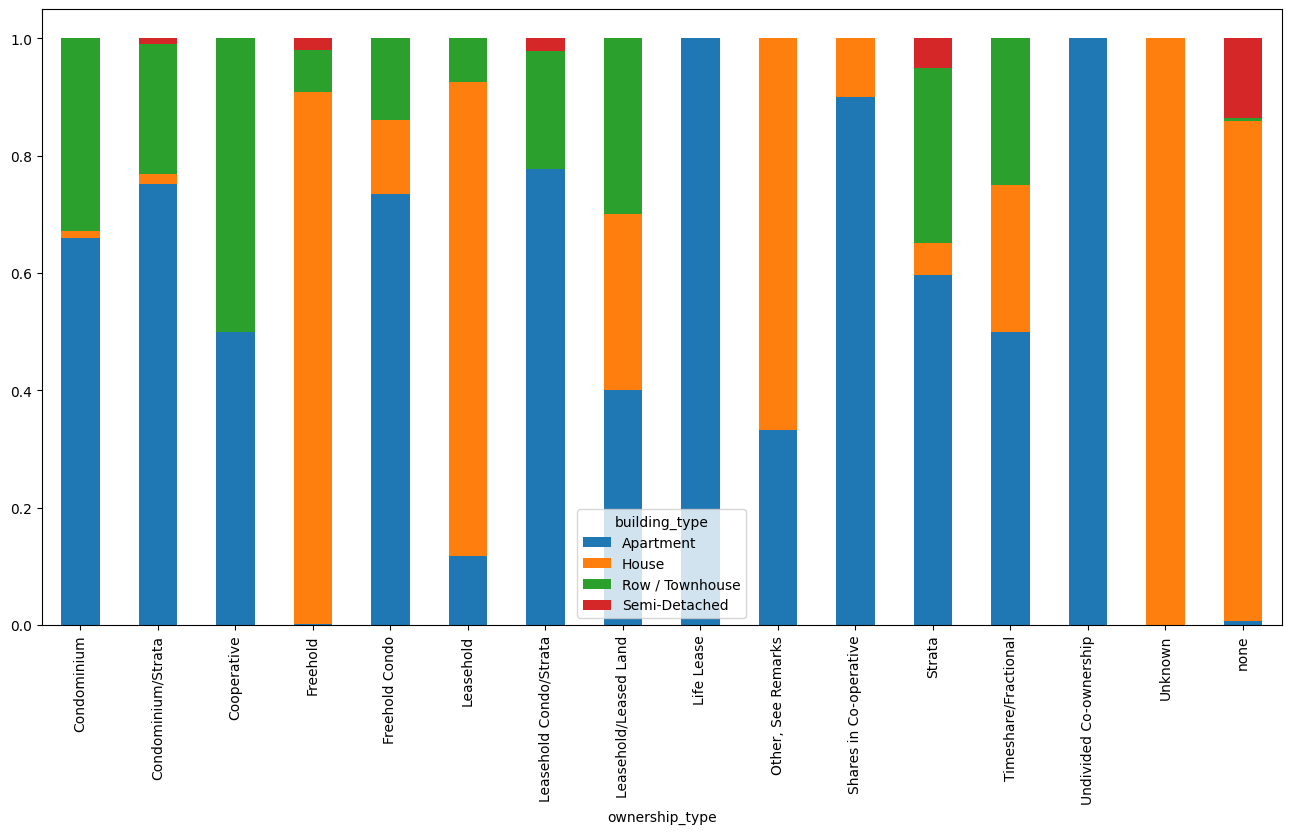

In [54]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [55]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12747
2           6488
none        2723
4             78
1 2           41
3              8
1 2 3 4        4
2 3            3
Name: count, dtype: int64

In [56]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          11570
none        2320
2            187
4             58
1 2 3 4        4
3              2
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       4541
1 2       41
none      19
1         18
4         12
3          4
2 3        3
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    370
1       262
2       131
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1629
1        897
none      14
4          8
3          2
Name: count, dtype: int64

In [60]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,12747.0,12747.0,10339.0,12747.0,12747.0,12747.0,1.274700e+04,12747.0
mean,26766244.0,3.0,2.0,-91.0,46.0,3.0,6.384901e+17,1063021.0
std,9294.0,1.0,1.0,19.0,4.0,4.0,1.498697e+12,1024838.0
min,26749554.0,0.0,1.0,-132.0,42.0,0.0,6.384872e+17,1.0
25%,26758372.0,2.0,1.0,-113.0,44.0,0.0,6.384889e+17,550000.0
50%,26766480.0,3.0,2.0,-80.0,45.0,3.0,6.384899e+17,799999.0
75%,26774152.0,4.0,2.0,-79.0,49.0,5.0,6.384913e+17,1258000.0
max,26782773.0,18.0,5.0,-53.0,59.0,101.0,6.384940e+17,35888000.0


In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2723.0,2723.0,2409.0,2723.0,2723.0,2723.0,2.723000e+03,2723.0
mean,26766857.0,2.0,2.0,-76.0,46.0,4.0,6.384902e+17,617586.0
std,9561.0,1.0,1.0,11.0,2.0,3.0,1.550645e+12,454970.0
min,26749565.0,0.0,1.0,-135.0,42.0,0.0,6.384872e+17,35000.0
25%,26758736.0,1.0,1.0,-74.0,45.0,2.0,6.384889e+17,350000.0
50%,26766806.0,2.0,2.0,-74.0,46.0,3.0,6.384900e+17,519900.0
75%,26774658.0,2.0,2.0,-73.0,47.0,5.0,6.384914e+17,749000.0
max,26782722.0,11.0,6.0,-62.0,65.0,32.0,6.384940e+17,7950000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,8.0,8.0,4.0,8.0,8.0,8.0,8.000000e+00,8.0
mean,26767502.0,2.0,2.0,-100.0,47.0,1.0,6.384906e+17,139722.0
std,12007.0,1.0,1.0,27.0,2.0,1.0,2.344707e+12,89918.0
min,26755636.0,1.0,1.0,-125.0,45.0,0.0,6.384883e+17,13775.0
25%,26756506.0,2.0,1.0,-124.0,45.0,0.0,6.384887e+17,100750.0
50%,26763758.0,2.0,2.0,-101.0,47.0,0.0,6.384897e+17,130000.0
75%,26781076.0,3.0,2.0,-79.0,50.0,1.0,6.384931e+17,174000.0
max,26782157.0,4.0,2.0,-61.0,50.0,2.0,6.384939e+17,275000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,78.0,78.0,50.0,78.0,78.0,78.0,7.800000e+01,78.0
mean,26764613.0,2.0,2.0,-98.0,47.0,1.0,6.384898e+17,496773.0
std,9391.0,1.0,1.0,22.0,3.0,2.0,1.523133e+12,309538.0
min,26749804.0,0.0,1.0,-124.0,43.0,0.0,6.384874e+17,75000.0
25%,26757342.0,1.0,1.0,-122.0,44.0,0.0,6.384888e+17,266225.0
50%,26763704.0,2.0,1.0,-95.0,49.0,0.0,6.384897e+17,416950.0
75%,26771605.0,2.0,2.0,-80.0,49.0,2.0,6.384907e+17,632400.0
max,26782715.0,4.0,6.0,-53.0,55.0,14.0,6.384940e+17,1449099.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,4.0,4.0,2.0,4.0,4.0,4.0,4.000000e+00,4.0
mean,26763167.0,3.0,1.0,-108.0,50.0,1.0,6.384896e+17,2621975.0
std,4307.0,2.0,0.0,32.0,4.0,1.0,7.259908e+11,2863430.0
min,26760022.0,1.0,1.0,-125.0,46.0,0.0,6.384890e+17,129000.0
25%,26760023.0,1.0,1.0,-124.0,49.0,0.0,6.384890e+17,152175.0
50%,26761748.0,3.0,1.0,-123.0,49.0,1.0,6.384894e+17,2554950.0
75%,26764892.0,5.0,1.0,-107.0,51.0,2.0,6.384899e+17,5024750.0
max,26769149.0,5.0,1.0,-60.0,55.0,2.0,6.384905e+17,5249000.0


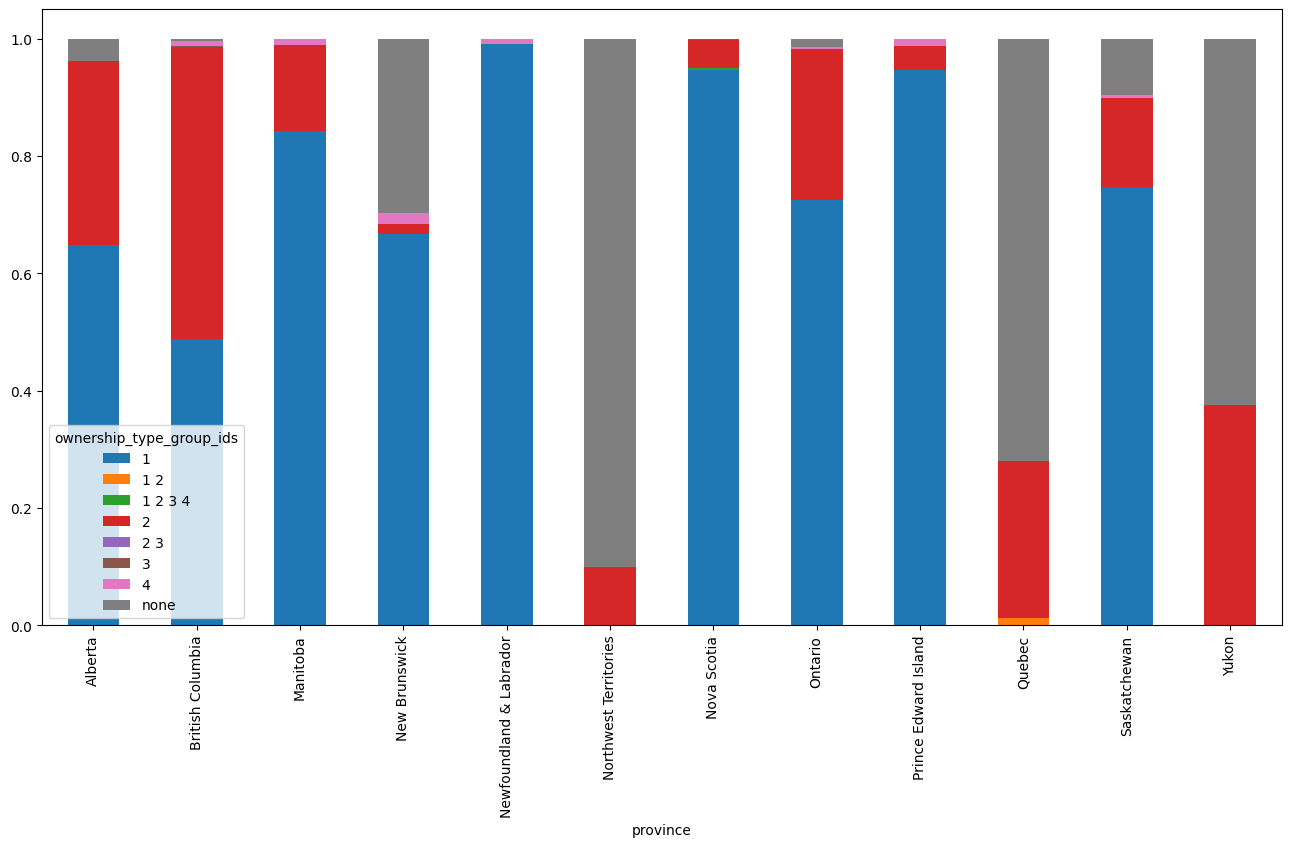

In [65]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [66]:
mask_other = ((df_bt["ownership_type_group_ids"] == "1") & (df_bt["ownership_type_group_ids"] == "2"))
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          12747
2           6488
none        2723
4             78
1 2           41
3              8
1 2 3 4        4
2 3            3
Name: count, dtype: int64

In [67]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)
df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 0: Other

/tmp/ipykernel_2973/3613108038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oti_new["ownership_type_group_ids"] = df_oti_new["ownership_type_group_ids"].astype(int)


ownership_type_group_ids
1    12747
2     6488
Name: count, dtype: int64

In [68]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bathrooms_total           19235 non-null  int64  
 3   bedrooms                  19235 non-null  object 
 4   stories_total             13098 non-null  float64
 5   size_interior             11465 non-null  object 
 6   building_type             19235 non-null  object 
 7   agency_name               19235 non-null  object 
 8   agency_type               19235 non-null  object 
 9   property_type             19235 non-null  object 
 10  lng                       19235 non-null  float64
 11  lat                       19235 non-null  float64
 12  ownership_type            19235 non-null  object 
 13  ownership_type_group_ids  19235 non-null  int64  
 14  land_size  

In [69]:
df_oti_new["province"].value_counts()

province
Ontario                    10290
British Columbia            3853
Alberta                     2434
Quebec                       853
Manitoba                     531
Saskatchewan                 502
Nova Scotia                  376
New Brunswick                205
Newfoundland & Labrador      110
Prince Edward Island          74
Yukon                          6
Northwest Territories          1
Name: count, dtype: int64

In [70]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [71]:
df = df_oti_new

In [72]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_2973/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    10703
True      8532
Name: count, dtype: int64

In [73]:
df.shape

(19235, 21)

In [74]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_2973/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26782429,24008132,3,4 + 1,NaN,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.239302,Freehold,1,59.31X131.63,0,https://realtor.ca/real-estate/26782429/4661-s...,638493917078870000,N9G2V1,Ontario,849900.0
1,26782419,24008291,1,2 + 0,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,Single Family,...,42.304374,Freehold,1,45.17X147.5,0,https://realtor.ca/real-estate/26782419/1722-k...,638493917016270000,N8W2W6,Ontario,349900.0
2,26782175,24008275,2,3 + 0,1.5,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,Single Family,...,42.304615,Freehold,1,33.13X87.48,0,https://realtor.ca/real-estate/26782175/1432-l...,638493881008200000,N8X4A5,Ontario,379900.0
3,26782172,24008278,2,4 + 1,2.0,NaN,Semi-Detached,KEY SOLUTIONS REALTY LTD. - 390,Firm,Single Family,...,42.310958,Freehold,1,29.11X121.30,0,https://realtor.ca/real-estate/26782172/947-wi...,638493881002070000,N9A1K1,Ontario,424900.0
4,26782021,24008248,1,2 + 0,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0


In [75]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_2973/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [76]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [77]:
pd.DataFrame(bed_extra).value_counts()

0
0    3791
1    3242
2    1271
3     204
4      21
5       2
7       1
Name: count, dtype: int64

In [78]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [79]:
len(bedrooms_extra)

19235

In [80]:
bedrooms_extra[:20]

['1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0']

In [81]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [82]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26782429,24008132,1,3,4 + 1,NaN,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.239302,Freehold,1,59.31X131.63,0,https://realtor.ca/real-estate/26782429/4661-s...,638493917078870000,N9G2V1,Ontario,849900.0
1,26782419,24008291,0,1,2 + 0,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.304374,Freehold,1,45.17X147.5,0,https://realtor.ca/real-estate/26782419/1722-k...,638493917016270000,N8W2W6,Ontario,349900.0
2,26782175,24008275,0,2,3 + 0,1.5,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.304615,Freehold,1,33.13X87.48,0,https://realtor.ca/real-estate/26782175/1432-l...,638493881008200000,N8X4A5,Ontario,379900.0
3,26782172,24008278,1,2,4 + 1,2.0,NaN,Semi-Detached,KEY SOLUTIONS REALTY LTD. - 390,Firm,...,42.310958,Freehold,1,29.11X121.30,0,https://realtor.ca/real-estate/26782172/947-wi...,638493881002070000,N9A1K1,Ontario,424900.0
4,26782021,24008248,0,1,2 + 0,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0
5,26782022,24008247,0,1,2 + 0,1.0,759.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.16X100.38,0,https://realtor.ca/real-estate/26782022/2209-f...,638493842661500000,N8W2G7,Ontario,299900.0
6,26781948,24008243,0,1,2 + 0,1.5,NaN,House,JUMP REALTY INC.,Firm,...,42.291945,Freehold,1,30X12o,0,https://realtor.ca/real-estate/26781948/3635-p...,638493826531770000,N9C1J8,Ontario,199999.0
7,26781947,24008251,1,4,2 + 1,1.0,NaN,Row / Townhouse,LC PLATINUM REALTY INC. - 525,Firm,...,42.231320,Freehold,1,41.18X141.73,0,https://realtor.ca/real-estate/26781947/1252-t...,638493826525500000,N9H0L9,Ontario,990000.0
8,26780368,X8254800,0,2,4,2.0,NaN,House,RE/MAX ACE REALTY INC.,Firm,...,42.308473,Freehold,1,25.1 x 100.65 FT,0,https://realtor.ca/real-estate/26780368/541-br...,638492382838400000,N9B2M3,Ontario,445000.0
9,26779682,24007278,1,2,3 + 1,NaN,NaN,House,EXP REALTY,Firm,...,42.277066,Freehold,1,50.19X100.16,0,https://realtor.ca/real-estate/26779682/2241-a...,638492224726570000,N9B3Y5,Ontario,699900.0


In [83]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_2973/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  object 
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  object 
 5   stories_total             13098 non-null  float64
 6   size_interior             11465 non-null  object 
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [85]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_2973/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [86]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26782429,24008132,1,3,4,NaN,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.239302,Freehold,1,59.31X131.63,0,https://realtor.ca/real-estate/26782429/4661-s...,638493917078870000,N9G2V1,Ontario,849900.0
1,26782419,24008291,0,1,2,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.304374,Freehold,1,45.17X147.5,0,https://realtor.ca/real-estate/26782419/1722-k...,638493917016270000,N8W2W6,Ontario,349900.0
2,26782175,24008275,0,2,3,1.5,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.304615,Freehold,1,33.13X87.48,0,https://realtor.ca/real-estate/26782175/1432-l...,638493881008200000,N8X4A5,Ontario,379900.0
3,26782172,24008278,1,2,4,2.0,NaN,Semi-Detached,KEY SOLUTIONS REALTY LTD. - 390,Firm,...,42.310958,Freehold,1,29.11X121.30,0,https://realtor.ca/real-estate/26782172/947-wi...,638493881002070000,N9A1K1,Ontario,424900.0
4,26782021,24008248,0,1,2,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0
5,26782022,24008247,0,1,2,1.0,759.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.16X100.38,0,https://realtor.ca/real-estate/26782022/2209-f...,638493842661500000,N8W2G7,Ontario,299900.0
6,26781948,24008243,0,1,2,1.5,NaN,House,JUMP REALTY INC.,Firm,...,42.291945,Freehold,1,30X12o,0,https://realtor.ca/real-estate/26781948/3635-p...,638493826531770000,N9C1J8,Ontario,199999.0
7,26781947,24008251,1,4,2,1.0,NaN,Row / Townhouse,LC PLATINUM REALTY INC. - 525,Firm,...,42.231320,Freehold,1,41.18X141.73,0,https://realtor.ca/real-estate/26781947/1252-t...,638493826525500000,N9H0L9,Ontario,990000.0
8,26780368,X8254800,0,2,4,2.0,NaN,House,RE/MAX ACE REALTY INC.,Firm,...,42.308473,Freehold,1,25.1 x 100.65 FT,0,https://realtor.ca/real-estate/26780368/541-br...,638492382838400000,N9B2M3,Ontario,445000.0
9,26779682,24007278,1,2,3,NaN,NaN,House,EXP REALTY,Firm,...,42.277066,Freehold,1,50.19X100.16,0,https://realtor.ca/real-estate/26779682/2241-a...,638492224726570000,N9B3Y5,Ontario,699900.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             13098 non-null  float64
 6   size_interior             11465 non-null  object 
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [88]:
df["province"].value_counts()

province
Ontario                    10290
British Columbia            3853
Alberta                     2434
Quebec                       853
Manitoba                     531
Saskatchewan                 502
Nova Scotia                  376
New Brunswick                205
Newfoundland & Labrador      110
Prince Edward Island          74
Yukon                          6
Northwest Territories          1
Name: count, dtype: int64

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             13098 non-null  float64
 6   size_interior             11465 non-null  object 
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26782429,24008132,1,3,4,NaN,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.239302,Freehold,1,59.31X131.63,0,https://realtor.ca/real-estate/26782429/4661-s...,638493917078870000,N9G2V1,Ontario,849900.0
1,26782419,24008291,0,1,2,1.0,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.304374,Freehold,1,45.17X147.5,0,https://realtor.ca/real-estate/26782419/1722-k...,638493917016270000,N8W2W6,Ontario,349900.0
2,26782175,24008275,0,2,3,1.5,NaN,House,RE/MAX PREFERRED REALTY LTD. - 584,Firm,...,42.304615,Freehold,1,33.13X87.48,0,https://realtor.ca/real-estate/26782175/1432-l...,638493881008200000,N8X4A5,Ontario,379900.0
3,26782172,24008278,1,2,4,2.0,NaN,Semi-Detached,KEY SOLUTIONS REALTY LTD. - 390,Firm,...,42.310958,Freehold,1,29.11X121.30,0,https://realtor.ca/real-estate/26782172/947-wi...,638493881002070000,N9A1K1,Ontario,424900.0
4,26782021,24008248,0,1,2,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00      4703
1.50       489
1.75        27
2.00      6077
2.50       147
3.00       968
3.50         1
4.00       274
5.00        49
6.00        85
7.00        18
8.00        27
9.00        13
10.00        8
11.00       12
12.00       22
13.00        6
14.00       12
15.00       14
16.00       12
17.00       11
18.00        5
19.00        7
20.00        6
21.00        6
22.00        7
23.00        3
24.00        3
25.00        2
26.00        4
27.00        1
28.00        5
29.00        5
30.00        8
32.00        2
33.00        2
34.00        5
35.00        1
36.00        7
37.00        2
38.00       17
39.00        1
40.00        4
41.00        2
44.00        4
48.00        2
50.00        3
51.00        1
52.00        2
54.00        2
57.00        1
82.00        1
127.00       1
350.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     4703
1.50      489
1.75       27
2.00     6077
2.50      147
3.00      968
3.50        1
4.00      274
5.00       49
6.00       85
7.00       18
8.00       27
9.00       13
10.00       8
11.00      12
12.00      22
13.00       6
14.00      12
15.00      14
16.00      12
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          2877
House              2419
Row / Townhouse     704
Semi-Detached       137
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

0        https://realtor.ca/real-estate/26782429/4661-s...
9        https://realtor.ca/real-estate/26779682/2241-a...
16       https://realtor.ca/real-estate/26777424/6-nobl...
22       https://realtor.ca/real-estate/26776690/854-pi...
25       https://realtor.ca/real-estate/26776297/486-je...
                               ...                        
25237    https://realtor.ca/real-estate/26773786/7-159-...
25238    https://realtor.ca/real-estate/26767214/216-21...
25239    https://realtor.ca/real-estate/26766372/408-22...
25247    https://realtor.ca/real-estate/26754951/40-58-...
25255    https://realtor.ca/real-estate/26781967/35-705...
Name: page_url, Length: 6137, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  object 
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     10840
2.00      6077
3.00       968
1.50       489
4.00       274
2.50       147
6.00        85
5.00        49
1.75        27
8.00        27
12.00       22
7.00        18
38.00       17
15.00       14
9.00        13
16.00       12
11.00       12
14.00       12
17.00       11
10.00        8
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

248      https://realtor.ca/real-estate/26768278/739-br...
507      https://realtor.ca/real-estate/26776057/1-2070...
512      https://realtor.ca/real-estate/26775549/3402-s...
522      https://realtor.ca/real-estate/26775182/2070-m...
599      https://realtor.ca/real-estate/26770039/106-20...
                               ...                        
25153    https://realtor.ca/real-estate/26753071/9611-1...
25183    https://realtor.ca/real-estate/26775579/204-61...
25194    https://realtor.ca/real-estate/26763395/50-400...
25209    https://realtor.ca/real-estate/26752791/102-12...
25226    https://realtor.ca/real-estate/26757672/5615-a...
Name: page_url, Length: 968, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  613
Alberta                 277
British Columbia        161
Ontario                  71
Nova Scotia               1
Prince Edward Island      1
Manitoba                  1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

899      https://realtor.ca/real-estate/26750813/1919-t...
989      https://realtor.ca/real-estate/26767462/129-co...
1046     https://realtor.ca/real-estate/26751776/1-lame...
1728     https://realtor.ca/real-estate/26776385/112-be...
1941     https://realtor.ca/real-estate/26770492/55-moo...
                               ...                        
25183    https://realtor.ca/real-estate/26775579/204-61...
25193    https://realtor.ca/real-estate/26765327/108-11...
25202    https://realtor.ca/real-estate/26758620/1308-1...
25208    https://realtor.ca/real-estate/26753722/2411-2...
25219    https://realtor.ca/real-estate/26749635/210-99...
Name: page_url, Length: 1125, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
3        False
4        False
         ...  
25237    False
25238    False
25239    False
25247    False
25255    False
Length: 19235, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
3        True
4        True
         ... 
25237    True
25238    True
25239    True
25247    True
25255    True
Length: 19235, dtype: bool

In [105]:
df_storey[mask_apt_storey].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1125 entries, 899 to 25219
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1125 non-null   int64  
 1   id_mls                    1125 non-null   object 
 2   bedrooms_extra            1125 non-null   int64  
 3   bathrooms_total           1125 non-null   int64  
 4   bedrooms                  1125 non-null   int64  
 5   stories_total             1125 non-null   float64
 6   size_interior             1066 non-null   object 
 7   building_type             1125 non-null   object 
 8   agency_name               1125 non-null   object 
 9   agency_type               1125 non-null   object 
 10  property_type             1125 non-null   object 
 11  lng                       1125 non-null   float64
 12  lat                       1125 non-null   float64
 13  ownership_type            1125 non-null   object 
 14  ownership_

In [106]:
# df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [107]:
# set storeys for all appartments to 1
df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [108]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00    11965
2.00     5933
3.00      667
1.50      487
2.50      147
1.75       27
4.00        6
5.00        2
3.50        1
Name: count, dtype: int64

In [109]:
df_storey["stories_total"].unique()

array([1.  , 1.5 , 2.  , 2.5 , 1.75, 3.  , 5.  , 4.  , 3.5 ])

In [110]:
df = df_storey

In [111]:
df["province"].value_counts()

province
Ontario                    10290
British Columbia            3853
Alberta                     2434
Quebec                       853
Manitoba                     531
Saskatchewan                 502
Nova Scotia                  376
New Brunswick                205
Newfoundland & Labrador      110
Prince Edward Island          74
Yukon                          6
Northwest Territories          1
Name: count, dtype: int64

## Handling Interior Size (Phase 1)

### First Looks

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  object 
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [113]:
df["size_interior"].value_counts()

size_interior
1040 sqft    30
1200.0000    23
1500.0000    21
1000.0000    21
1100.0000    21
             ..
2990 sqft     1
9349 sqft     1
1635 sqft     1
418 sqft      1
1294 sqft     1
Name: count, Length: 6643, dtype: int64

In [114]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26782021,24008248,0,1,2,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0
5,26782022,24008247,0,1,2,1.0,759.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.16X100.38,0,https://realtor.ca/real-estate/26782022/2209-f...,638493842661500000,N8W2G7,Ontario,299900.0
11,26779494,40574518,0,2,5,2.0,1400.0000,House,Davenport Realty Brokerage,Firm,...,42.290048,Freehold,1,under 1/2 acre,0,https://realtor.ca/real-estate/26779494/3765-3...,638492098921930000,N9C1K1,Ontario,499000.0
14,26777678,24008223,0,2,2,1.0,1400.0000,Row / Townhouse,PINNACLE PLUS REALTY LTD.,Firm,...,42.131642,Freehold,1,51.94X98.46,0,https://realtor.ca/real-estate/26777678/600-ha...,638491576664470000,N9V0H1,Ontario,649000.0
15,26777430,24008104,0,1,2,1.0,1050.0000,House,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.047794,Freehold,1,51.93X281.58,0,https://realtor.ca/real-estate/26777430/1810-e...,638491540841230000,N9V2Y8,Ontario,699900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25237,26773786,15555,0,3,3,1.0,1848 sqft,Row / Townhouse,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.778996,Condominium/Strata,2,1848 sqft,0,https://realtor.ca/real-estate/26773786/7-159-...,638491234802730000,Y1A0R4,Yukon,529900.0
25238,26767214,15551,0,1,2,1.0,800 sqft,Apartment,RE/MAX ACTION REALTY,Firm,...,60.777770,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26767214/216-21...,638490118781000000,Y1A0S4,Yukon,376900.0
25239,26766372,15550,0,1,1,1.0,523 sqft,Apartment,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.729299,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26766372/408-22...,638489932791800000,Y1A1C8,Yukon,425000.0
25247,26754951,15541,0,2,2,1.0,1280 sqft,House,COLDWELL BANKER REDWOOD REALTY,Firm,...,60.705298,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26754951/40-58-...,638488210918070000,Y1A6V6,Yukon,449900.0


In [115]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
4,26782021,24008248,0,1,2,1.0,613.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.15X93.36,0,https://realtor.ca/real-estate/26782021/2215-f...,638493842658800000,N8W2G7,Ontario,249900.0
5,26782022,24008247,0,1,2,1.0,759.0000,House,DEERBROOK REALTY INC. - 175,Firm,...,42.296095,Freehold,1,40.16X100.38,0,https://realtor.ca/real-estate/26782022/2209-f...,638493842661500000,N8W2G7,Ontario,299900.0
11,26779494,40574518,0,2,5,2.0,1400.0000,House,Davenport Realty Brokerage,Firm,...,42.290048,Freehold,1,under 1/2 acre,0,https://realtor.ca/real-estate/26779494/3765-3...,638492098921930000,N9C1K1,Ontario,499000.0
14,26777678,24008223,0,2,2,1.0,1400.0000,Row / Townhouse,PINNACLE PLUS REALTY LTD.,Firm,...,42.131642,Freehold,1,51.94X98.46,0,https://realtor.ca/real-estate/26777678/600-ha...,638491576664470000,N9V0H1,Ontario,649000.0
15,26777430,24008104,0,1,2,1.0,1050.0000,House,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.047794,Freehold,1,51.93X281.58,0,https://realtor.ca/real-estate/26777430/1810-e...,638491540841230000,N9V2Y8,Ontario,699900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,26762908,TB240892,0,1,2,1.0,1150.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.440192,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26762908/unit-1...,638489659408770000,P7B7C8,Ontario,329900.0
16708,26756326,TB240871,0,1,2,1.0,896.0000,Apartment,SIGNATURE NORTH REALTY INC.,Firm,...,48.404266,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26756326/102-14...,638488722957430000,P7C5Y4,Ontario,234900.0
16710,26756325,TB240870,0,2,2,1.0,1215.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.441356,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26756325/unit-3...,638488722948300000,P7A5R3,Ontario,624900.0
16715,26750774,TB240850,0,2,3,1.0,1175.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.436913,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26750774/unit-3...,638487895401230000,P7B1B8,Ontario,399900.0


In [116]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
20259,26781744,A2124944,0,4,4,2.0,1884 sqft,Row / Townhouse,ROYAL LEPAGE SOUTH COUNTRY - Crowsnest Pass,Firm,...,49.632532,Condominium/Strata,2,Unknown,4,https://realtor.ca/real-estate/26781744/71-iro...,638493466432800000,T0K0M0,Alberta,479000.0
20260,26781668,A2123982,4,3,3,1.0,1871 sqft,House,CIR REALTY,Firm,...,49.576655,Freehold,1,"7900 sqft|7,251 - 10,889 sqft",4,https://realtor.ca/real-estate/26781668/3021-2...,638493424455430000,T0K0C0,Alberta,779000.0
20262,26780647,A2123861,1,2,2,1.0,1011 sqft,House,SUTTON GROUP-LETHBRIDGE CROWSNEST PASS BRANCH,Firm,...,49.608671,Freehold,1,"5750 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26780647/13021-...,638492506417800000,T0K0E0,Alberta,387000.0
20270,26761279,A2122263,0,3,3,2.0,1994 sqft,House,Century 21 Foothills South Real Estate,Firm,...,49.567337,Freehold,1,"6000 sqft|4,051 - 7,250 sqft",3,https://realtor.ca/real-estate/26761279/1121-2...,638489212522430000,T0K1C0,Alberta,600000.0
20273,26749604,A2122897,0,4,4,2.0,3699 sqft,House,SUTTON GROUP-LETHBRIDGE CROWSNEST PASS BRANCH,Firm,...,49.643782,Freehold,1,3.14 ac|2 - 4.99 acres,0,https://realtor.ca/real-estate/26749604/8106-2...,638487202501900000,T0K0M0,Alberta,875000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25216,26749877,A2122942,3,3,3,1.0,1542.7 sqft,House,EXP REALTY,Firm,...,56.762290,Freehold,1,"5502.69 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26749877/109-fi...,638487440279870000,T9K0B8,Alberta,549900.0
25217,26749809,A2122934,3,2,3,1.0,1008.8 sqft,House,RE/MAX FORT MCMURRAY,Firm,...,56.736234,Freehold,1,"6216.15 sqft|4,051 - 7,250 sqft",2,https://realtor.ca/real-estate/26749809/174-oa...,638487374119830000,T9K1M5,Alberta,379900.0
25219,26749635,A2122226,0,2,2,1.0,1169 sqft,Apartment,COLDWELL BANKER UNITED,Firm,...,56.730112,Condominium/Strata,2,Unknown,1,https://realtor.ca/real-estate/26749635/210-99...,638487260177200000,T9H5L1,Alberta,199900.0
25229,26774880,A2124128,2,3,3,1.0,1738 sqft,House,RE/MAX Grande Prairie,Firm,...,58.199423,Freehold,1,3.14 ac|2 - 4.99 acres,10,https://realtor.ca/real-estate/26774880/146-gr...,638491374234000000,T0H2H0,Alberta,799000.0


In [117]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10997,26782483,18834221,0,1,2,1.0,1117 sqft,Apartment,FLASH IMMOBILIER INC./FLASH REAL ESTATE INC.,Firm,...,45.472804,Condominium/Strata,2,118.92 m2,2,https://realtor.ca/real-estate/26782483/33-rue...,638493923102400000,J8Z3H4,Quebec,284900.0
11027,26781832,12982430,0,1,2,1.0,974.13 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.447892,Condominium/Strata,2,127.53 m2,1,https://realtor.ca/real-estate/26781832/160-bo...,638493560376200000,J8Y6L9,Quebec,264900.0
11040,26781146,10890119,0,1,2,1.0,1035.49 sqft,Apartment,RE/MAX VISION,Firm,...,45.435139,Condominium/Strata,2,240.3 sqft,1,https://realtor.ca/real-estate/26781146/348-3-...,638493128992200000,J9J0C8,Quebec,349900.0
11050,26780672,22153308,0,1,2,1.0,1049.48 sqft,Apartment,PROPRIO DIRECT,Firm,...,45.447675,Condominium/Strata,2,156.33 m2,1,https://realtor.ca/real-estate/26780672/720-bo...,638492515545800000,J9A0E7,Quebec,359900.0
11064,26779872,27226379,0,1,2,1.0,849.27 sqft,Apartment,RE/MAX DIRECT INC.,Firm,...,45.422703,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26779872/1-imp-...,638492265411170000,J9A2T9,Quebec,204900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16789,26753694,25751110,0,2,3,1.0,884.26 sqft,House,PROPRIO DIRECT - Val d'Or (JD),Firm,...,48.118467,Condominium/Strata,2,478.5 m2,2,https://realtor.ca/real-estate/26753694/188-ru...,638488086210130000,J9P0N3,Quebec,390000.0
16900,26774665,25667140,0,1,1,1.0,721.18 sqft,Apartment,VIA CAPITALE HORIZON,Firm,...,48.444180,Condominium/Strata,2,1733.4 m2,1,https://realtor.ca/real-estate/26774665/324-ru...,638491368476200000,G5L9A8,Quebec,191000.0
16908,26763609,13017299,0,2,2,1.0,135.3 m2,Apartment,VIA CAPITALE HORIZON,Firm,...,48.449340,Condominium/Strata,2,977.7 m2,2,https://realtor.ca/real-estate/26763609/212-av...,638489716263070000,G5L5J2,Quebec,479000.0
16912,26760895,25308761,0,2,2,1.0,1811.57 sqft,Apartment,PROPRIO DIRECT,Firm,...,48.432104,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26760895/740-bo...,638489137916830000,G5L3T1,Quebec,499000.0


### m2 to sqft

In [118]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

/tmp/ipykernel_2973/254142588.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11711,26755248,18756059,0,1,2,1.0,101 m2,Apartment,EXP AGENCE IMMOBILIÈRE,Firm,...,45.384322,Condominium/Strata,2,1959.03 sqft,1,https://realtor.ca/real-estate/26755248/164-ch...,638488270460900000,J9H0G9,Quebec,329900.0
11976,26768417,20576428,0,1,4,1.0,223.7 m2,Row / Townhouse,RE/MAX ROYAL (JORDAN) INC. - VAUDREUIL/DORION,Firm,...,45.391293,Condominium/Strata,2,242.58 m2,4,https://realtor.ca/real-estate/26768417/1450-r...,638490504416370000,J7V3E6,Quebec,699000.0
12257,26780872,15230660,0,1,1,1.0,42.6 m2,Apartment,GROUPE SUTTON - EXPERT,Firm,...,45.491211,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26780872/170-ru...,638492656966530000,H3C2A5,Quebec,409000.0
12278,26780652,12070607,0,2,2,1.0,120.1 m2,Apartment,PRO IMMOBILIER & HYPOTHÈQUE INC.,Firm,...,45.595087,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26780652/3705-r...,638492512372670000,H7E5A7,Quebec,525000.0
12350,26779555,18016977,0,1,2,1.0,81.38 m2,Apartment,RE/MAX ACTION - Westmount,Firm,...,45.467279,Condominium/Strata,2,38084 sqft,1,https://realtor.ca/real-estate/26779555/7928-c...,638492123499200000,H4W3L5,Quebec,419000.0


In [119]:
df[contains_meters]["province"].value_counts()

province
Alberta    971
Quebec      25
Name: count, dtype: int64

In [120]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11711,26755248,18756059,0,1,2,1.0,1087.164,Apartment,EXP AGENCE IMMOBILIÈRE,Firm,...,45.384322,Condominium/Strata,2,1959.03 sqft,1,https://realtor.ca/real-estate/26755248/164-ch...,638488270460900000,J9H0G9,Quebec,329900.0
11976,26768417,20576428,0,1,4,1.0,2407.9068,Row / Townhouse,RE/MAX ROYAL (JORDAN) INC. - VAUDREUIL/DORION,Firm,...,45.391293,Condominium/Strata,2,242.58 m2,4,https://realtor.ca/real-estate/26768417/1450-r...,638490504416370000,J7V3E6,Quebec,699000.0
12257,26780872,15230660,0,1,1,1.0,458.5464,Apartment,GROUPE SUTTON - EXPERT,Firm,...,45.491211,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26780872/170-ru...,638492656966530000,H3C2A5,Quebec,409000.0
12278,26780652,12070607,0,2,2,1.0,1292.7564,Apartment,PRO IMMOBILIER & HYPOTHÈQUE INC.,Firm,...,45.595087,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26780652/3705-r...,638492512372670000,H7E5A7,Quebec,525000.0
12350,26779555,18016977,0,1,2,1.0,875.97432,Apartment,RE/MAX ACTION - Westmount,Firm,...,45.467279,Condominium/Strata,2,38084 sqft,1,https://realtor.ca/real-estate/26779555/7928-c...,638492123499200000,H4W3L5,Quebec,419000.0


In [121]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

/tmp/ipykernel_2973/818222402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
137,26782615,24008239,0,4,3,1.5,1699 sqft,House,EXIT REALTY CK ELITE,Firm,...,42.402980,Freehold,1,60.01X125|under 1/4 acre,0,https://realtor.ca/real-estate/26782615/143-ga...,638493950561230000,N7L5M3,Ontario,599900.0
209,26774504,24008153,0,4,3,2.0,3959 sqft,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.313364,Freehold,1,100X150|under 1/2 acre,0,https://realtor.ca/real-estate/26774504/19155-...,638491358486000000,N0P2L0,Ontario,1679000.0
338,26758544,24007828,0,1,3,1.5,1769 sqft,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.587439,Freehold,1,80.26X165.54|under 1/2 acre,0,https://realtor.ca/real-estate/26758544/664-al...,638488910504130000,N8A1Y5,Ontario,399900.0
352,26757541,24007692,0,4,5,2.0,3179 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.400240,Freehold,1,82.16X198.00|under 1/2 acre,0,https://realtor.ca/real-estate/26757541/257-vi...,638488838517970000,N7L3A7,Ontario,899900.0
379,26756112,24007837,0,2,4,1.0,2000 sqft,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.588848,Freehold,1,53X186,0,https://realtor.ca/real-estate/26756112/51-pin...,638488694378130000,N8A3L9,Ontario,674900.0


In [122]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           2960
Alberta                    1463
Quebec                      791
Manitoba                    530
Saskatchewan                502
Ontario                     460
New Brunswick               111
Newfoundland & Labrador     110
Yukon                         6
Northwest Territories         1
Name: count, dtype: int64

### Remove "sqft" Markdown

In [123]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
137,26782615,24008239,0,4,3,1.5,1699.0,House,EXIT REALTY CK ELITE,Firm,...,42.402980,Freehold,1,60.01X125|under 1/4 acre,0,https://realtor.ca/real-estate/26782615/143-ga...,638493950561230000,N7L5M3,Ontario,599900.0
209,26774504,24008153,0,4,3,2.0,3959.0,House,ROYAL LEPAGE PEIFER REALTY Brokerage,Firm,...,42.313364,Freehold,1,100X150|under 1/2 acre,0,https://realtor.ca/real-estate/26774504/19155-...,638491358486000000,N0P2L0,Ontario,1679000.0
338,26758544,24007828,0,1,3,1.5,1769.0,House,HOMEWARD REALTY INC. Brokerage,Firm,...,42.587439,Freehold,1,80.26X165.54|under 1/2 acre,0,https://realtor.ca/real-estate/26758544/664-al...,638488910504130000,N8A1Y5,Ontario,399900.0
352,26757541,24007692,0,4,5,2.0,3179.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.400240,Freehold,1,82.16X198.00|under 1/2 acre,0,https://realtor.ca/real-estate/26757541/257-vi...,638488838517970000,N7L3A7,Ontario,899900.0
379,26756112,24007837,0,2,4,1.0,2000.0,House,ROYAL LEPAGE PEIFER REALTY (DRESDEN),Firm,...,42.588848,Freehold,1,53X186,0,https://realtor.ca/real-estate/26756112/51-pin...,638488694378130000,N8A3L9,Ontario,674900.0


In [124]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  object 
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [125]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  float64
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [126]:
df_si["province"].value_counts()

province
Ontario                    10290
British Columbia            3853
Alberta                     2434
Quebec                       853
Manitoba                     531
Saskatchewan                 502
Nova Scotia                  376
New Brunswick                205
Newfoundland & Labrador      110
Prince Edward Island          74
Yukon                          6
Northwest Territories          1
Name: count, dtype: int64

In [127]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 7280
Nova Scotia              376
Prince Edward Island      74
Quebec                    37
British Columbia           2
Manitoba                   1
Name: count, dtype: int64

In [128]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3851.0
Ontario                    3010.0
Quebec                      816.0
Manitoba                    530.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [129]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  float64
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [131]:
df["land_size"].value_counts()

land_size
under 1/2 acre       1555
0                     880
Unknown               558
under 1 acre          152
1/2 - 1.99 acres      126
                     ... 
37.63 x 88.64 FT        1
50.03 x 100 FT          1
44.95 x 118.11 FT       1
33.83 x 100.79 FT       1
1848 sqft               1
Name: count, Length: 9792, dtype: int64

In [132]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
33,26775204,24008188,0,2,2,1.0,1000.0,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.307430,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26775204/3000-s...,638491396585470000,N9C4G3,Ontario,299900.0
52,26769428,24008108,0,2,2,1.0,1189.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.244426,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26769428/1855-n...,638490568515870000,N9H2R4,Ontario,399900.0
58,26768277,24008088,0,2,2,1.0,1229.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.249516,Condominium/Strata,2,200X400,0,https://realtor.ca/real-estate/26768277/1740-a...,638490496576300000,N9J0E6,Ontario,689900.0
66,26765212,24007988,0,2,2,1.0,1122.0,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
67,26765207,24008037,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0
70,26765204,24008041,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Freehold,1,0X,0,https://realtor.ca/real-estate/26765204/90-mur...,638489812557370000,N9V4B9,Ontario,349900.0
74,26762962,24007990,0,3,2,1.0,2450.0,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.316242,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762962/1225-r...,638489668557130000,N9A0A2,Ontario,1238000.0
82,26762253,24007985,0,1,1,1.0,705.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.314869,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26762253/540-ou...,638489632461000000,N9A1B7,Ontario,199900.0
87,26762017,24007974,0,2,2,1.0,1129.0,Apartment,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26762017/2550-s...,638489596489530000,N8H2R6,Ontario,509900.0
94,26759593,24007936,0,1,1,1.0,743.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.247257,Condominium/Strata,2,200X,0,https://realtor.ca/real-estate/26759593/1740-s...,638488984659800000,N9J0E6,Ontario,519900.0


In [133]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

33     https://realtor.ca/real-estate/26775204/3000-s...
52     https://realtor.ca/real-estate/26769428/1855-n...
58     https://realtor.ca/real-estate/26768277/1740-a...
66     https://realtor.ca/real-estate/26765212/5840-n...
67     https://realtor.ca/real-estate/26765207/90-mur...
70     https://realtor.ca/real-estate/26765204/90-mur...
74     https://realtor.ca/real-estate/26762962/1225-r...
82     https://realtor.ca/real-estate/26762253/540-ou...
87     https://realtor.ca/real-estate/26762017/2550-s...
94     https://realtor.ca/real-estate/26759593/1740-s...
118    https://realtor.ca/real-estate/26752596/365-pe...
122    https://realtor.ca/real-estate/26751794/150-pa...
152    https://realtor.ca/real-estate/26782174/1390-l...
170    https://realtor.ca/real-estate/26781040/140-pa...
171    https://realtor.ca/real-estate/26780453/10-der...
176    https://realtor.ca/real-estate/26777425/320-vi...
204    https://realtor.ca/real-estate/26774533/5125-r...
242    https://realtor.ca/real-

In [134]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                         651
Unknown                   307
under 1 acre               79
0 x 0                      48
under 1/2 acre             44
                         ... 
41.13 m2                    1
90.83 m2                    1
2273.87 sqft                1
166.8 sqft                  1
60.0000|80 - 160 acres      1
Name: count, Length: 381, dtype: int64

### Set Land Size on Apartments to Zero

In [135]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
33,26775204,24008188,0,2,2,1.0,1000.0,Apartment,RE/MAX CARE REALTY - 828,Firm,...,42.307430,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26775204/3000-s...,638491396585470000,N9C4G3,Ontario,299900.0
52,26769428,24008108,0,2,2,1.0,1189.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.244426,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26769428/1855-n...,638490568515870000,N9H2R4,Ontario,399900.0
58,26768277,24008088,0,2,2,1.0,1229.0,Apartment,DEERBROOK REALTY INC. - 175,Firm,...,42.249516,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26768277/1740-a...,638490496576300000,N9J0E6,Ontario,689900.0
66,26765212,24007988,0,2,2,1.0,1122.0,Apartment,THE DAN GEMUS REAL ESTATE TEAM LTD. - 520,Firm,...,42.248764,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26765212/5840-n...,638489812594830000,N9J0E3,Ontario,524900.0
67,26765207,24008037,0,2,2,1.0,1000.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 639,Firm,...,42.102268,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26765207/90-mur...,638489812565170000,N9V4B9,Ontario,349900.0


In [136]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  float64
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [137]:
df_apt_0["land_size"].value_counts()

land_size
0                                                             4568
under 1/2 acre                                                1511
Unknown                                                        251
0                                                              229
1/2 - 1.99 acres                                               123
                                                              ... 
49.24 x 111.7 FT ; 108.64Ft X 27.59Ft X 27.59Ft X 111.7Ft.       1
60 x 130 FT                                                      1
30.22 x 90.32 FT                                                 1
40 x 103 FT                                                      1
1848 sqft                                                        1
Name: count, Length: 9441, dtype: int64

In [138]:
len(df_apt_0["land_size"].unique())

9442

In [139]:
df_apt_0["land_size"].value_counts().tail()

land_size
49.24 x 111.7 FT ; 108.64Ft X 27.59Ft X 27.59Ft X 111.7Ft.    1
60 x 130 FT                                                   1
30.22 x 90.32 FT                                              1
40 x 103 FT                                                   1
1848 sqft                                                     1
Name: count, dtype: int64

In [140]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    13481
True         8
Name: count, dtype: int64

### "under 1/2 acre"

In [141]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

/tmp/ipykernel_2973/2741531740.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"


land_size
0                                   4568
under 1/2 acre                      2202
Unknown                              251
0                                    229
1/2 - 1.99 acres                     123
                                    ... 
25.19 x 103.93 FT                      1
50 x 139.5 FT                          1
58.83 x 98.52 FT ; Irregular Lot       1
25.2 x 152.1 FT                        1
1848 sqft                              1
Name: count, Length: 8872, dtype: int64

### Handling/Removing Irregular Land Size

In [142]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

/tmp/ipykernel_2973/3020055740.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()


,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
256,26768008,24008047,2,2,3,1.0,1422.0,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.147170,Freehold,1,890.13Xirreg,0,https://realtor.ca/real-estate/26768008/278-co...,638490460620730000,N0R1B0,Ontario,1550000.0
725,26762949,24007948,0,2,2,1.0,1975.0,House,CAMPBELL CHATHAM-KENT REALTY LTD. Brokerage,Firm,...,42.327455,Freehold,1,149.63Xirregular|under 1/4 acre,0,https://realtor.ca/real-estate/26762949/18386-...,638489666404100000,N0P1A0,Ontario,699000.0
3099,26779762,E8254266,1,4,4,2.0,NaN,House,RE/MAX GOLD REALTY INC.,Firm,...,43.846000,Freehold,1,30.02 x 92.05 FT ; ** 24 Hours Notice Required **,4,https://realtor.ca/real-estate/26779762/737-cr...,638492235954670000,L1X2X1,Ontario,1099000.0
4580,26769812,W8234202,2,2,3,1.0,NaN,House,ROYAL LEPAGE CERTIFIED REALTY,Firm,...,43.416049,Freehold,1,65.26 x 115.91 FT ; Gorgeous Lot - First Time ...,6,https://realtor.ca/real-estate/26769812/520-sa...,638490581435600000,L6L4G4,Ontario,1399900.0
7754,26763499,E8243130,1,3,4,2.0,NaN,Row / Townhouse,RE/MAX REALTY SERVICES INC.,Firm,...,43.916767,Freehold,1,25.63 x 110.35 FT ; Perfect Home/Desirable Nei...,3,https://realtor.ca/real-estate/26763499/43-cre...,638489715000700000,L1R2K2,Ontario,849000.0


In [143]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  float64
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [144]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia           37
Ontario                     4
Newfoundland & Labrador     4
Name: count, dtype: int64

In [145]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    10286.0
British Columbia            3816.0
Newfoundland & Labrador      106.0
Alberta                        NaN
Manitoba                       NaN
New Brunswick                  NaN
Northwest Territories          NaN
Nova Scotia                    NaN
Prince Edward Island           NaN
Quebec                         NaN
Saskatchewan                   NaN
Yukon                          NaN
Name: count, dtype: float64

In [146]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19235 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19235 non-null  int64  
 1   id_mls                    19235 non-null  object 
 2   bedrooms_extra            19235 non-null  int64  
 3   bathrooms_total           19235 non-null  int64  
 4   bedrooms                  19235 non-null  int64  
 5   stories_total             19235 non-null  float64
 6   size_interior             11465 non-null  float64
 7   building_type             19235 non-null  object 
 8   agency_name               19235 non-null  object 
 9   agency_type               19235 non-null  object 
 10  property_type             19235 non-null  object 
 11  lng                       19235 non-null  float64
 12  lat                       19235 non-null  float64
 13  ownership_type            19235 non-null  object 
 14  ownership_t

In [148]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100236 entries, 0 to 100235
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100236 non-null  int64  
 1   id_mls                    100236 non-null  object 
 2   bathrooms_total           100236 non-null  float64
 3   bedrooms_extra            100236 non-null  float64
 4   bedrooms                  100236 non-null  float64
 5   stories_total             100236 non-null  float64
 6   size_interior             100236 non-null  float64
 7   building_type             100236 non-null  object 
 8   agency_name               100236 non-null  object 
 9   agency_type               100236 non-null  object 
 10  property_type             100236 non-null  object 
 11  lng                       100236 non-null  float64
 12  lat                       100236 non-null  float64
 13  ownership_type            100236 non-null  o

### Removing Price outliers from the bottom

In [149]:
df_norm = df.copy(deep=True)

In [150]:
df_norm.shape

(19235, 22)

In [151]:
df_init.shape

(100236, 22)

In [152]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [153]:
df_norm.shape

(19109, 22)

### Removing Outliers on phase 1 features

In [154]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [155]:
# NOT ALL province/building_type combinations might exist !!!

In [156]:
df_norm.shape

(15215, 22)

In [157]:
# NO MORE LOCAL OUTLIER FACTOR!

In [158]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,ownership_type_group_ids,parkings,timestamp,price
count,15215.0,15215.0,15215.0,15215.0,15215.0,9383.0,15215.0,15215.0,15215.0,15215.0,1.521500e+04,15215.0
mean,26766196.0,0.0,2.0,3.0,1.0,3161.0,-93.0,47.0,1.0,2.0,6.384901e+17,844583.0
std,9283.0,1.0,1.0,1.0,0.0,154860.0,20.0,3.0,0.0,3.0,1.488680e+12,605597.0
min,26749541.0,0.0,0.0,0.0,1.0,1.0,-135.0,42.0,1.0,0.0,6.384872e+17,58500.0
25%,26758376.0,0.0,2.0,2.0,1.0,980.0,-114.0,44.0,1.0,0.0,6.384889e+17,477700.0
50%,26766293.0,0.0,2.0,3.0,1.0,1363.0,-80.0,45.0,1.0,1.0,6.384899e+17,699900.0
75%,26774146.0,0.0,3.0,3.0,2.0,1965.0,-79.0,49.0,2.0,4.0,6.384913e+17,999900.0
max,26782714.0,2.0,5.0,8.0,3.0,15002000.0,-53.0,62.0,2.0,12.0,6.384940e+17,10995000.0


In [159]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                       1.000000
bathrooms_total             0.652593
size_interior               0.616143
bedrooms                    0.433114
stories_total               0.242415
timestamp                   0.092451
id                          0.087130
lat                         0.027010
lng                        -0.012324
ownership_type_group_ids   -0.186177
bedrooms_extra                   NaN
parkings                         NaN
Name: price, dtype: float64

In [160]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15215 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15215 non-null  float64
 1   id_mls                    15215 non-null  object 
 2   bedrooms_extra            15215 non-null  float64
 3   bathrooms_total           15215 non-null  float64
 4   bedrooms                  15215 non-null  float64
 5   stories_total             15215 non-null  float64
 6   size_interior             9383 non-null   float64
 7   building_type             15215 non-null  object 
 8   agency_name               15215 non-null  object 
 9   agency_type               15215 non-null  object 
 10  property_type             15215 non-null  object 
 11  lng                       15215 non-null  float64
 12  lat                       15215 non-null  float64
 13  ownership_type            15215 non-null  object 
 14  ownership_t

In [161]:
df = df_norm.copy(deep=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15215 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15215 non-null  float64
 1   id_mls                    15215 non-null  object 
 2   bedrooms_extra            15215 non-null  float64
 3   bathrooms_total           15215 non-null  float64
 4   bedrooms                  15215 non-null  float64
 5   stories_total             15215 non-null  float64
 6   size_interior             9383 non-null   float64
 7   building_type             15215 non-null  object 
 8   agency_name               15215 non-null  object 
 9   agency_type               15215 non-null  object 
 10  property_type             15215 non-null  object 
 11  lng                       15215 non-null  float64
 12  lat                       15215 non-null  float64
 13  ownership_type            15215 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [163]:
# df = df.drop("id_mls", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15215 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15215 non-null  float64
 1   id_mls                    15215 non-null  object 
 2   bedrooms_extra            15215 non-null  float64
 3   bathrooms_total           15215 non-null  float64
 4   bedrooms                  15215 non-null  float64
 5   stories_total             15215 non-null  float64
 6   size_interior             9383 non-null   float64
 7   building_type             15215 non-null  object 
 8   agency_name               15215 non-null  object 
 9   agency_type               15215 non-null  object 
 10  property_type             15215 non-null  object 
 11  lng                       15215 non-null  float64
 12  lat                       15215 non-null  float64
 13  ownership_type            15215 non-null  object 
 14  ownership_t

In [165]:
df_aug = pd.concat([df_init, df])

In [166]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115451 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        115451 non-null  float64
 1   id_mls                    115451 non-null  object 
 2   bathrooms_total           115451 non-null  float64
 3   bedrooms_extra            115451 non-null  float64
 4   bedrooms                  115451 non-null  float64
 5   stories_total             115451 non-null  float64
 6   size_interior             109619 non-null  float64
 7   building_type             115451 non-null  object 
 8   agency_name               115451 non-null  object 
 9   agency_type               115451 non-null  object 
 10  property_type             115451 non-null  object 
 11  lng                       115451 non-null  float64
 12  lat                       115451 non-null  float64
 13  ownership_type            115451 non-null  object 

## Remove Duplicates once more

In [167]:
len(df_aug["id"].unique())

109422

In [168]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [169]:
df_aug.shape

(109422, 22)

In [170]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109422 entries, 0 to 25255
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109422 non-null  float64
 1   id_mls                    109422 non-null  object 
 2   bathrooms_total           109422 non-null  float64
 3   bedrooms_extra            109422 non-null  float64
 4   bedrooms                  109422 non-null  float64
 5   stories_total             109422 non-null  float64
 6   size_interior             105968 non-null  float64
 7   building_type             109422 non-null  object 
 8   agency_name               109422 non-null  object 
 9   agency_type               109422 non-null  object 
 10  property_type             109422 non-null  object 
 11  lng                       109422 non-null  float64
 12  lat                       109422 non-null  float64
 13  ownership_type            109422 non-null  object 

In [171]:
df_aug["province"].value_counts()

province
Ontario                    50151
British Columbia           24222
Alberta                    15236
Quebec                      7891
Saskatchewan                4420
Manitoba                    3282
Nova Scotia                 1890
New Brunswick               1390
Prince Edward Island         398
Newfoundland & Labrador      386
Yukon                        100
Northwest Territories         56
Name: count, dtype: int64

# Save to CSV (to be continued)

In [172]:
df_aug["id"] = df_aug["id"].astype(int)
df_aug.to_csv("data/aug/data-aug-2024-04-22.csv", index=False)